## Drug User Classification

Data from: https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in dataset into dataframe
df = pd.read_csv('drug_consumption.txt', sep = ",", header = None)
df.head()

0        1        2        3        4        5        6        7        8   \
0   1  0.49788  0.48246 -0.05921  0.96082  0.12600  0.31287 -0.57545 -0.58331   
1   2 -0.07854 -0.48246  1.98437  0.96082 -0.31685 -0.67825  1.93886  1.43533   
2   3  0.49788 -0.48246 -0.05921  0.96082 -0.31685 -0.46725  0.80523 -0.84732   
3   4 -0.95197  0.48246  1.16365  0.96082 -0.31685 -0.14882 -0.80615 -0.01928   
4   5  0.49788  0.48246  1.98437  0.96082 -0.31685  0.73545 -1.63340 -0.45174   

        9   ...   22   23   24   25   26   27   28   29   30   31  
0 -0.91699  ...  CL0  CL0  CL0  CL0  CL0  CL0  CL0  CL2  CL0  CL0  
1  0.76096  ...  CL4  CL0  CL2  CL0  CL2  CL3  CL0  CL4  CL0  CL0  
2 -1.62090  ...  CL0  CL0  CL0  CL0  CL0  CL0  CL1  CL0  CL0  CL0  
3  0.59042  ...  CL0  CL0  CL2  CL0  CL0  CL0  CL0  CL2  CL0  CL0  
4 -0.30172  ...  CL1  CL0  CL0  CL1  CL0  CL0  CL2  CL2  CL0  CL0  

[5 rows x 32 columns]

In [3]:
# Define columns and create dictionaries for columns represented by values
columns = ['ID', 'Age', 'Gender', 'Education_level', 'Country', 'Ethnicity', 'Neuroticism_score', 'Extraversion_score',
          'Openness_score', 'Agreeableness_score', 'Conscientiousness_score', 'Impulsiveness', 'Sensation_seeing',
          'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstacy',
          'Heroin', 'Ketamine', 'Legal_highs', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer_fake_drug',
          'Volatile_substance_abuse']
age_dict = {-0.95197 : '18-24', -0.07854 : '25-34', .49788 : '35-44',
            1.09449 : '45-54', 1.82213 : '55-64', 2.59171 : '65+'}
gender_dict = {0.48246 : 'Female', -0.48246 : 'Male'}
education_dict = {-2.43591 : '< 16', -1.73790 : '16', -1.43719 : '17', -1.22751 : '18', -0.61113 : 'Some college',
                  -0.05921 : 'Associates degree', 0.45468 : 'Bachelors degree', 1.16365 : 'Masters degree',
                  1.98437 : 'Doctorate degree'}
country_dict = {-0.09765 : 'Australia', 0.24923 : 'Canada', -0.46841 : 'New Zealand', 0.21128 : 'Ireland',
                0.96082 : 'UK', -0.57009 : 'USA', -0.28519 : 'Other'}
ethnicity_dict = {-0.50212 : 'Asian', -1.10702 : 'Black', 1.90725 : 'Mixed-Black/Asian', 0.12600 : 'Mixed-White/Asian',
                  -0.22166 : 'Mixed-White/Black', 0.11440 : 'Other', -0.31685 : 'White'}
neuroticism_dict = {-3.46436 : 12, -3.15735 : 13, -2.75696 : 14, -2.52197 : 15, -2.42317 : 16, -2.34360 : 17,
                    -2.21844 : 18, -2.05048 : 19, -1.86962 : 20, -1.69163 : 21, -1.55078 : 22, -1.43907 : 23,
                    -1.32828 : 24, -1.19430 : 25, -1.05308 : 26, -0.92104 : 27, -0.79151 : 28, -0.67825 : 29,
                    -0.58016 : 30, -0.46725 : 31, -0.34799 : 32, -0.24649 : 33, -0.14882 : 34, -0.05188 : 35,
                    0.04257 : 36, 0.13606 : 37, 0.22393 : 38, 0.31287 : 39, 0.41667 : 40, 0.52135 : 41, 0.62967 : 42,
                    0.73545 : 43, 0.82562 : 44, 0.91093 : 45, 1.02119 : 46, 1.13281 : 47, 1.23461 : 48, 1.37297 : 49,
                    1.49158 : 50, 1.60383 : 51, 1.72012 : 52, 1.83990 : 53, 1.98437 : 54, 2.12700 : 55, 2.28554 : 56,
                    2.46262 : 57, 2.61139 : 58, 2.82196 : 59, 3.27393 : 60}
extraversion_dict = {-3.27393 : 16, -3.00537 : 18, -2.72827 : 19, -2.53830 : 20, -2.44904 : 21, -2.32338 : 22,
                     -2.21069 : 23, -2.11437 : 24, -2.03972 : 25, -1.92173 : 26, -1.76250 : 27, -1.63340 : 28,
                     -1.50796 : 29, -1.37639 : 30, -1.23177 : 31, -1.09207 : 32, -0.94779 : 33, -0.80615 : 34,
                     -0.69509 : 35, -0.57545 : 36, -0.43999 : 37, -0.30033 : 38, -0.15487 : 39, 0.00332 : 40,
                     0.16767 : 41, 0.32197 : 42, 0.47617 : 43, 0.63779 : 44, 0.80523 : 45, 0.96248 : 46, 1.11406 : 47,
                     1.28610 : 48, 1.45421 : 49, 1.58487 : 50, 1.74091 : 51, 1.93886 : 52, 2.12700 : 53, 2.32338 : 54,
                     2.57309 : 55, 2.85950 : 56, 3.00537 : 58, 3.27393 : 59}
openness_dict = {-3.27393 : 24, -2.85950 : 26, -2.63199 : 28, -2.39883 : 29, -2.21069 : 30, -2.09015 : 31, -1.97495 : 32,
                 -1.82919 : 33, -1.68062 : 34, -1.55521 : 35, -1.42424 : 36, -1.27553 : 37, -1.11902 : 38, -0.97631 : 39,
                 -0.84732 : 40, -0.71727 : 41, -0.58331 : 42, -0.45174 : 43, -0.31776 : 44, -0.17779 : 45, -0.01928 : 46,
                 0.14143 : 47, 0.29338 : 48, 0.44585 : 49, 0.58331 : 50, 0.72330 : 51, 0.88309 : 52, 1.06238 : 53,
                 1.24033 : 54, 1.43533 : 55, 1.65653 : 56, 1.88511 : 57, 2.15324 : 58, 2.44904 : 59, 2.90161 : 60}
agreeableness_dict = {-3.46436 : 12, -3.15735 : 16, -3.00537 : 18, -2.90161 : 23, -2.78793 : 24, -2.70172 : 25,
                      -2.53830 : 26, -2.35413 : 27, -2.21844 : 28, -2.07848 : 29, -1.92595 : 30, -1.77200 : 31,
                      -1.62090 : 32, -1.47955 : 33, -1.34289 : 34, -1.21213 : 35, -1.07533 : 36, -0.91699 : 37,
                      -0.76096 : 38, -0.60633 : 39, -0.45321 : 40, -0.30172 : 41, -0.15487 : 42, -0.01729 : 43,
                      0.13136 : 44, 0.28783 : 45, 0.43852 : 46, 0.59042 : 47, 0.76096 : 48, 0.94156 : 49, 1.11406 : 50,
                      1.2861 : 51, 1.45039 : 52, 1.61108 : 53, 1.81866 : 54, 2.03972 : 55, 2.23427 : 56, 2.46262 : 57,
                      2.75696 : 58, 3.15735 : 59, 3.46436 : 60}
conscientiousness_dict = {-3.46436 : 17, -3.15735 : 19, -2.90161 : 20, -2.72827 : 21, -2.57309 : 22, -2.42317 : 23,
                          -2.30408 : 24, -2.18109 : 25, -2.04506 : 26, -1.92173 : 27, -1.78169 : 28, -1.64101 : 29,
                          -1.51840 : 30, -1.38502 : 31, -1.25773 : 32, -1.13788 : 33, -1.01450 : 34, -0.89891 : 35,
                          -0.78155 : 36, -0.65253 : 37, -0.52745 : 38, -0.40581 : 39, -0.27607 : 40, -0.14277 : 41,
                          -0.00665 : 42, 0.12331 : 43, 0.25953 : 44, 0.41594 : 45, 0.58489 : 46, 0.7583 : 47,
                          0.93949 : 48, 1.13407 : 49, 1.30612 : 50, 1.46191 : 51, 1.63088 : 52, 1.81175 : 53,
                          2.04506 : 54, 2.33337 : 55, 2.63199 : 56, 3.00537 : 57, 3.46436 : 59}
drug_use_dict = {'CL0' : 0, 'CL1' : 0, 'CL2' : 1, 'CL3' : 1, 'CL4' : 1, 'CL5' : 1, 'CL6' : 1}

In [4]:
# Apply column names
df.columns = columns

In [5]:
# Map dictionary values to dataframe for better sense of the data
df.Age = df.Age.map(lambda x: age_dict[round(x, 5)])
df.Gender = df.Gender.map(lambda x: gender_dict[round(x, 5)])
df.Education_level = df.Education_level.map(lambda x: education_dict[round(x, 5)])
df.Country = df.Country.map(lambda x: country_dict[round(x, 5)])
df.Ethnicity = df.Ethnicity.map(lambda x: ethnicity_dict[round(x, 5)])
df.Neuroticism_score = df.Neuroticism_score.map(lambda x: neuroticism_dict[round(x, 5)])
df.Extraversion_score = df.Extraversion_score.map(lambda x: extraversion_dict[round(x, 5)])
df.Openness_score = df.Openness_score.map(lambda x: openness_dict[round(x, 5)])
df.Agreeableness_score = df.Agreeableness_score.map(lambda x: agreeableness_dict[round(x, 5)])
df.Conscientiousness_score = df.Conscientiousness_score.map(lambda x: conscientiousness_dict[round(x, 5)])

In [6]:
df.head()

ID    Age  Gender    Education_level Country          Ethnicity  \
0   1  35-44  Female  Associates degree      UK  Mixed-White/Asian   
1   2  25-34    Male   Doctorate degree      UK              White   
2   3  35-44    Male  Associates degree      UK              White   
3   4  18-24  Female     Masters degree      UK              White   
4   5  35-44  Female   Doctorate degree      UK              White   

   Neuroticism_score  Extraversion_score  Openness_score  Agreeableness_score  \
0                 39                  36              42                   37   
1                 29                  52              55                   48   
2                 31                  45              40                   32   
3                 34                  34              46                   47   
4                 43                  28              43                   41   

   ...  Ecstacy  Heroin  Ketamine Legal_highs  LSD Meth Mushrooms Nicotine  \
0  ...      CL0     CL0       CL0         CL0  CL0  CL0       CL0      CL2   
1  ...      CL4     CL0       CL2         CL0  CL2  CL3       CL0      CL4   
2  ...      CL0     CL0       CL0         CL0  CL0  CL0       CL1      CL0   
3  ...      CL0     CL0       CL2         CL0  CL0  CL0       CL0      CL2   
4  ...      CL1     CL0       CL0         CL1  CL0  CL0       CL2      CL2   

  Semer_fake_drug Volatile_substance_abuse  
0             CL0                      CL0  
1             CL0                      CL0  
2             CL0                      CL0  
3             CL0                      CL0  
4             CL0                      CL0  

[5 rows x 32 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
ID                          1885 non-null int64
Age                         1885 non-null object
Gender                      1885 non-null object
Education_level             1885 non-null object
Country                     1885 non-null object
Ethnicity                   1885 non-null object
Neuroticism_score           1885 non-null int64
Extraversion_score          1885 non-null int64
Openness_score              1885 non-null int64
Agreeableness_score         1885 non-null int64
Conscientiousness_score     1885 non-null int64
Impulsiveness               1885 non-null float64
Sensation_seeing            1885 non-null float64
Alcohol                     1885 non-null object
Amphet                      1885 non-null object
Amyl                        1885 non-null object
Benzos                      1885 non-null object
Caffeine                    1885 non-null object
Cannabis       

In [8]:
# Drop ID Column
df.drop('ID', axis = 1, inplace = True)

In [9]:
# Apply drug use mapping to drug columns
# Never use or use more than a decade ago mapped to 0, everything else mapped to 1
df.iloc[:, 12:] = df.iloc[:, 12:].applymap(lambda x: drug_use_dict[x])

In [10]:
df.head()

Age  Gender    Education_level Country          Ethnicity  \
0  35-44  Female  Associates degree      UK  Mixed-White/Asian   
1  25-34    Male   Doctorate degree      UK              White   
2  35-44    Male  Associates degree      UK              White   
3  18-24  Female     Masters degree      UK              White   
4  35-44  Female   Doctorate degree      UK              White   

   Neuroticism_score  Extraversion_score  Openness_score  Agreeableness_score  \
0                 39                  36              42                   37   
1                 29                  52              55                   48   
2                 31                  45              40                   32   
3                 34                  34              46                   47   
4                 43                  28              43                   41   

   Conscientiousness_score  ...  Ecstacy  Heroin  Ketamine  Legal_highs  LSD  \
0                       42  ...        0       0         0            0    0   
1                       41  ...        1       0         1            0    1   
2                       34  ...        0       0         0            0    0   
3                       46  ...        0       0         1            0    0   
4                       50  ...        0       0         0            0    0   

   Meth  Mushrooms  Nicotine  Semer_fake_drug  Volatile_substance_abuse  
0     0          0         1                0                         0  
1     1          0         1                0                         0  
2     0          0         0                0                         0  
3     0          0         1                0                         0  
4     0          1         1                0                         0  

[5 rows x 31 columns]

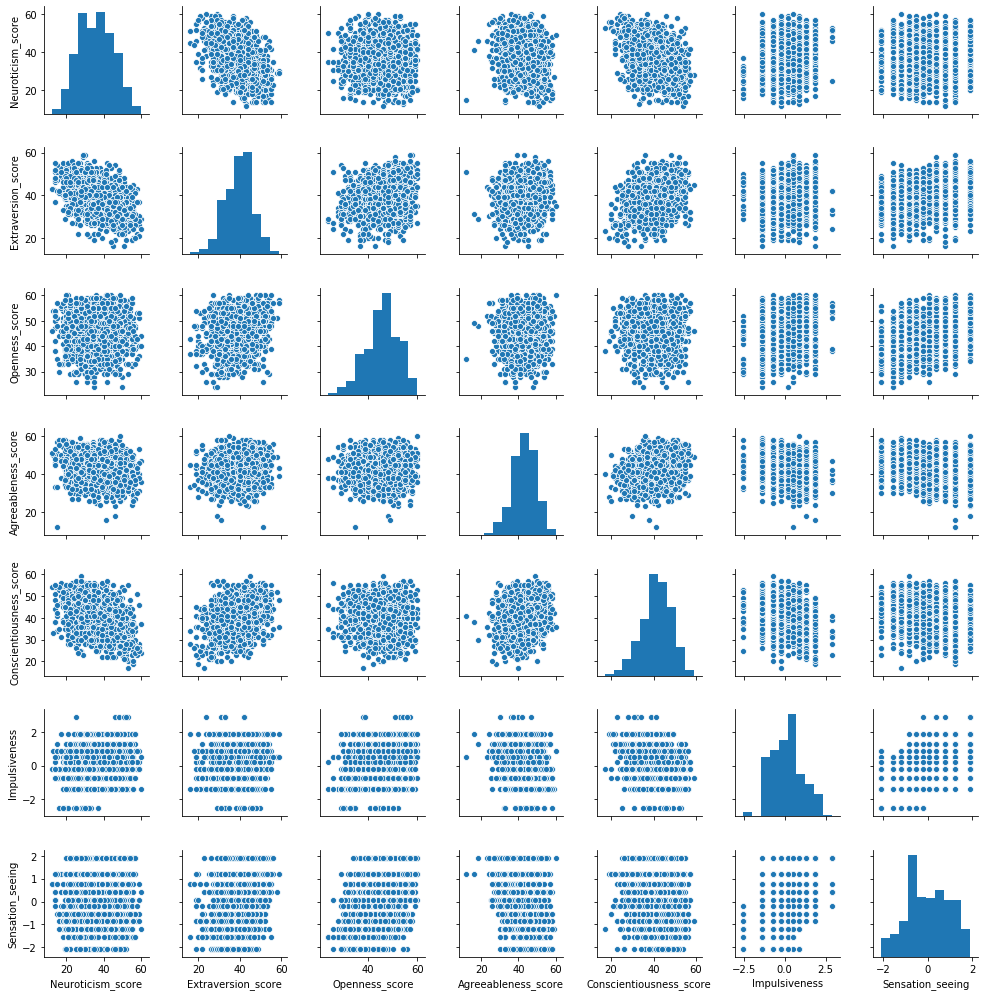

In [11]:
# Check pairplot of continuous variables
sns.pairplot(df.iloc[:, :12], size = 2)

In [12]:
# Check correlation of continuous variables
df.iloc[:, :12].corr() > .75

Neuroticism_score  Extraversion_score  \
Neuroticism_score                     True               False   
Extraversion_score                   False                True   
Openness_score                       False               False   
Agreeableness_score                  False               False   
Conscientiousness_score              False               False   
Impulsiveness                        False               False   
Sensation_seeing                     False               False   

                         Openness_score  Agreeableness_score  \
Neuroticism_score                 False                False   
Extraversion_score                False                False   
Openness_score                     True                False   
Agreeableness_score               False                 True   
Conscientiousness_score           False                False   
Impulsiveness                     False                False   
Sensation_seeing                  False                False   

                         Conscientiousness_score  Impulsiveness  \
Neuroticism_score                          False          False   
Extraversion_score                         False          False   
Openness_score                             False          False   
Agreeableness_score                        False          False   
Conscientiousness_score                     True          False   
Impulsiveness                              False           True   
Sensation_seeing                           False          False   

                         Sensation_seeing  
Neuroticism_score                   False  
Extraversion_score                  False  
Openness_score                      False  
Agreeableness_score                 False  
Conscientiousness_score             False  
Impulsiveness                       False  
Sensation_seeing                     True

In [13]:
# Dummy variables for categorical data columns
df = pd.get_dummies(df, columns = ['Age', 'Gender', 'Education_level', 'Country', 'Ethnicity'],
                                drop_first = True)

In [14]:
df.head()

Neuroticism_score  Extraversion_score  Openness_score  Agreeableness_score  \
0                 39                  36              42                   37   
1                 29                  52              55                   48   
2                 31                  45              40                   32   
3                 34                  34              46                   47   
4                 43                  28              43                   41   

   Conscientiousness_score  Impulsiveness  Sensation_seeing  Alcohol  Amphet  \
0                       42       -0.21712          -1.18084        1       1   
1                       41       -0.71126          -0.21575        1       1   
2                       34       -1.37983           0.40148        1       0   
3                       46       -1.37983          -1.18084        1       0   
4                       50       -0.21712          -0.21575        1       0   

   Amyl  ...  Country_New Zealand  Country_Other  Country_UK  Country_USA  \
0     0  ...                    0              0           1            0   
1     1  ...                    0              0           1            0   
2     0  ...                    0              0           1            0   
3     0  ...                    0              0           1            0   
4     0  ...                    0              0           1            0   

   Ethnicity_Black  Ethnicity_Mixed-Black/Asian  Ethnicity_Mixed-White/Asian  \
0                0                            0                            1   
1                0                            0                            0   
2                0                            0                            0   
3                0                            0                            0   
4                0                            0                            0   

   Ethnicity_Mixed-White/Black  Ethnicity_Other  Ethnicity_White  
0                            0                0                0  
1                            0                0                1  
2                            0                0                1  
3                            0                0                1  
4                            0                0                1  

[5 rows x 52 columns]

In [15]:
df.columns

Index(['Neuroticism_score', 'Extraversion_score', 'Openness_score',
       'Agreeableness_score', 'Conscientiousness_score', 'Impulsiveness',
       'Sensation_seeing', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caffeine',
       'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstacy', 'Heroin',
       'Ketamine', 'Legal_highs', 'LSD', 'Meth', 'Mushrooms', 'Nicotine',
       'Semer_fake_drug', 'Volatile_substance_abuse', 'Age_25-34', 'Age_35-44',
       'Age_45-54', 'Age_55-64', 'Age_65+', 'Gender_Male',
       'Education_level_17', 'Education_level_18', 'Education_level_< 16',
       'Education_level_Associates degree', 'Education_level_Bachelors degree',
       'Education_level_Doctorate degree', 'Education_level_Masters degree',
       'Education_level_Some college', 'Country_Canada', 'Country_Ireland',
       'Country_New Zealand', 'Country_Other', 'Country_UK', 'Country_USA',
       'Ethnicity_Black', 'Ethnicity_Mixed-Black/Asian',
       'Ethnicity_Mixed-White/Asian', 'Ethnicity_Mixe

In [16]:
# Reorder dataframe columns
df = df[['Age_25-34', 'Age_35-44', 'Age_45-54', 'Age_55-64', 'Age_65+', 'Gender_Male', 'Education_level_17',
    'Education_level_18', 'Education_level_< 16', 'Education_level_Associates degree',
    'Education_level_Bachelors degree', 'Education_level_Doctorate degree', 'Education_level_Masters degree',
    'Education_level_Some college', 'Country_Canada', 'Country_Ireland', 'Country_New Zealand', 'Country_Other',
    'Country_UK', 'Country_USA', 'Ethnicity_Black', 'Ethnicity_Mixed-Black/Asian', 'Ethnicity_Mixed-White/Asian',
    'Ethnicity_Mixed-White/Black', 'Ethnicity_Other', 'Ethnicity_White', 'Neuroticism_score', 'Extraversion_score',
    'Openness_score', 'Agreeableness_score', 'Conscientiousness_score', 'Impulsiveness', 'Sensation_seeing',
    'Semer_fake_drug', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine',
    'Crack', 'Ecstacy', 'Heroin', 'Ketamine', 'Legal_highs', 'LSD', 'Meth', 'Mushrooms', 'Nicotine']]
df.head()

Age_25-34  Age_35-44  Age_45-54  Age_55-64  Age_65+  Gender_Male  \
0          0          1          0          0        0            0   
1          1          0          0          0        0            1   
2          0          1          0          0        0            1   
3          0          0          0          0        0            0   
4          0          1          0          0        0            0   

   Education_level_17  Education_level_18  Education_level_< 16  \
0                   0                   0                     0   
1                   0                   0                     0   
2                   0                   0                     0   
3                   0                   0                     0   
4                   0                   0                     0   

   Education_level_Associates degree  ...  Cocaine  Crack  Ecstacy  Heroin  \
0                                  1  ...        0      0        0       0   
1                                  0  ...        1      0        1       0   
2                                  1  ...        0      0        0       0   
3                                  0  ...        1      0        0       0   
4                                  0  ...        0      0        0       0   

   Ketamine  Legal_highs  LSD  Meth  Mushrooms  Nicotine  
0         0            0    0     0          0         1  
1         1            0    1     1          0         1  
2         0            0    0     0          0         0  
3         1            0    0     0          0         1  
4         0            0    0     0          1         1  

[5 rows x 51 columns]

In [18]:
# Create drug dataframe names for next step
df_names = [x + '_df' for x in list(df.columns)[34:]]

In [19]:
# create dictionary with drug and drug specific dataframe
drug_dict = {}
for drug in df_names:
    drug_df = pd.DataFrame(df.iloc[:, :34]).merge(df[[drug[:-3]]], right_index = True, left_index = True)
    drug_dict[drug] = drug_df

In [20]:
# Import libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
import itertools
import scikitplot as skplt

/Users/bengeissel/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV

### Helper Functions

In [21]:
# function to split dataframe into features and target
def get_x_y(df):
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1:]
    y.columns = ['target']
    return X, y

In [22]:
# function to apply standard scaling post train_test_split
def scaling(X_train, X_test):
    ss = StandardScaler()
    # Fit Transform and replace on X_train
    numeric_train = X_train.iloc[:, 26:33]
    X_train.drop(columns = ['Neuroticism_score', 'Extraversion_score', 'Openness_score', 'Agreeableness_score',
                            'Conscientiousness_score', 'Impulsiveness', 'Sensation_seeing'], inplace = True)
    scaled_train = pd.DataFrame(ss.fit_transform(numeric_train))
    scaled_train.columns = numeric_train.columns
    scaled_train.index = numeric_train.index
    X_train = X_train.merge(scaled_train, right_index = True, left_index = True)
    
    # Transform and replace on X_test
    numeric_test = X_test.iloc[:, 26:33]
    X_test.drop(columns = ['Neuroticism_score', 'Extraversion_score', 'Openness_score', 'Agreeableness_score',
                            'Conscientiousness_score', 'Impulsiveness', 'Sensation_seeing'], inplace = True)
    scaled_test = pd.DataFrame(ss.transform(numeric_test))
    scaled_test.columns = numeric_test.columns
    scaled_test.index = numeric_test.index
    X_test = X_test.merge(scaled_test, right_index = True, left_index = True)
    
    return X_train, X_test

In [23]:
# Function to apply SMOTE
def smote_train(X_train, y_train):
    smote = SMOTE()
    X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)
    return X_train_resampled, y_train_resampled

### Grid Search Functions

In [24]:
# Function to grid search for best C and penalty
def grid_search_CP(X_train, y_train):
    penalty = ['l1', 'l2']
    C = np.arange(.1, 50, .5)
    hyperparameters = dict(C = C, penalty = penalty)
    lr = LogisticRegression()
    clf = GridSearchCV(lr, hyperparameters, cv = 5, verbose = 0)
    X_train_res, y_train_res = smote_train(X_train, y_train)
    grid = clf.fit(X_train_res, y_train_res)
    c = grid.best_estimator_.get_params()['C']
    p = grid.best_estimator_.get_params()['penalty']
    return c, p

In [52]:
# Function to grid search for best k value (# of neighbors for knn)
def grid_search_neighbors(X_train, y_train):
    K = list(range(1, 9, 2))
    hyperparameters = dict(n_neighbors = K)
    knn = KNeighborsClassifier()
    clf = GridSearchCV(knn, hyperparameters, cv = 5, verbose = 0)
    X_train_res, y_train_res = smote_train(X_train, y_train)
    grid = clf.fit(X_train_res, y_train_res)
    k = grid.best_estimator_.get_params()['n_neighbors']
    return k

In [53]:
# Function to grid search for best n value (# of estimators for random forest)
def grid_search_estimators(X_train, y_train):
    N = list(range(70, 125, 5))
    hyperparameters = dict(n_estimators = N)
    rf = RandomForestClassifier()
    clf = GridSearchCV(rf, hyperparameters, cv = 5, verbose = 0)
    X_train_res, y_train_res = smote_train(X_train, y_train)
    grid = clf.fit(X_train_res, y_train_res)
    n = grid.best_estimator_.get_params()['n_estimators']
    return n

### Model Fitting Functions

In [78]:
# Function to fit Logistic Regression Model and predict on test set
def run_logreg(X_train, X_test, y_train, y_test, C, penalty):
    # Print test data balances
    y_pos = y_test.target.value_counts()[1]
    drug_user_percent = round(y_pos/ len(y_test), 2)
    print(f'Drug user percent: {drug_user_percent * 100}%')
    print()
    print('Logisitic Regression Results:')
    
    # Fit model and get predictions
    model = LogisticRegression(C = C, penalty = penalty, fit_intercept = False, solver = 'liblinear')
    X_train_res, y_train_res = smote_train(X_train, y_train)
    model_fit = model.fit(X_train_res, y_train_res)
    y_hat_test = model.predict(X_test)
    
    # Calculate metrics
    prec = precision_score(y_test, y_hat_test)
    recall = recall_score(y_test, y_hat_test)
    acc = accuracy_score(y_test, y_hat_test)
    f1 = f1_score(y_test, y_hat_test)
    print()
    print("Model Metrics:")
    print(f"Precision: {prec}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {acc}")
    print(f"F1_Score: {f1}")
    
    # Plot Confusion Matrix
    skplt.metrics.plot_confusion_matrix(y_test, y_hat_test, figsize = (4,4))
    plt.ylim([1.5, -.5])
    plt.tight_layout()
    plt.show()
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    AUC = auc(fpr, tpr)
    scores = [prec, recall, acc, f1, AUC]
    print()
    print(f'AUC: {AUC}')
    plt.plot(fpr, tpr, lw = 2, label = 'ROC Curve', color = 'orange')
    plt.plot([0,1], [0,1], lw = 2, linestyle = '--', color = 'r')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('ROC Curve and AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()
    plt.show()
    
    print('-'*75)
    
    return pd.DataFrame({
        'Model' : ['Logistic_Regression' for i in scores],
        'Metric' : ['Precision', 'Recall', 'Accuracy', 'F1_Score', 'AUC'],
        'Score' : scores})

In [79]:
# Function to fit Naive Bayes Gaussian Model and predict on test set
def run_NB_Gaussian(X_train, X_test, y_train, y_test):
    print('Naive Bayes - Gaussian Results:')
        
    # Fit model and get predictions
    model = GaussianNB()
    X_train_res, y_train_res = smote_train(X_train, y_train)
    model_fit = model.fit(X_train_res, y_train_res)
    y_hat_test = model.predict(X_test)
    
    # Calculate metrics
    prec = precision_score(y_test, y_hat_test)
    recall = recall_score(y_test, y_hat_test)
    acc = accuracy_score(y_test, y_hat_test)
    f1 = f1_score(y_test, y_hat_test)
    print()
    print("Model Metrics:")
    print(f"Precision: {prec}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {acc}")
    print(f"F1_Score: {f1}")
    
    # Plot Confusion Matrix
    skplt.metrics.plot_confusion_matrix(y_test, y_hat_test, figsize = (4,4))
    plt.ylim([1.5, -.5])
    plt.tight_layout()
    plt.show()
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    AUC = auc(fpr, tpr)
    scores = [prec, recall, acc, f1, AUC]
    print()
    print(f'AUC: {AUC}')
    plt.plot(fpr, tpr, lw = 2, label = 'ROC Curve', color = 'orange')
    plt.plot([0,1], [0,1], lw = 2, linestyle = '--', color = 'r')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('ROC Curve and AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()
    plt.show()
    
    print('-'*75)
    
    return pd.DataFrame({
        'Model' : ['NB_Gaussian' for i in scores],
        'Metric' : ['Precision', 'Recall', 'Accuracy', 'F1_Score', 'AUC'],
        'Score' : scores})

In [80]:
# Function to fit K-Nearest Neighbors Model and predict on test set
def run_knn(X_train, X_test, y_train, y_test, k):
    print('K-Nearest Neighbors Results:')
    
    # Fit model and get predictions
    model = KNeighborsClassifier(n_neighbors = k)
    X_train_res, y_train_res = smote_train(X_train, y_train)
    model_fit = model.fit(X_train_res, y_train_res)
    y_hat_test = model.predict(X_test)

    # Calculate metrics
    prec = precision_score(y_test, y_hat_test)
    recall = recall_score(y_test, y_hat_test)
    acc = accuracy_score(y_test, y_hat_test)
    f1 = f1_score(y_test, y_hat_test)
    print()
    print("Model Metrics:")
    print(f"Precision: {prec}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {acc}")
    print(f"F1_Score: {f1}")
    
    # Plot Confusion Matrix
    skplt.metrics.plot_confusion_matrix(y_test, y_hat_test, figsize = (4,4))
    plt.ylim([1.5, -.5])
    plt.tight_layout()
    plt.show()
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    AUC = auc(fpr, tpr)
    scores = [prec, recall, acc, f1, AUC]
    print()
    print(f'AUC: {AUC}')
    plt.plot(fpr, tpr, lw = 2, label = 'ROC Curve', color = 'orange')
    plt.plot([0,1], [0,1], lw = 2, linestyle = '--', color = 'r')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('ROC Curve and AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()
    plt.show()
    
    print('-'*75)
    
    return pd.DataFrame({
        'Model' : ['KNN' for i in scores],
        'Metric' : ['Precision', 'Recall', 'Accuracy', 'F1_Score', 'AUC'],
        'Score' : scores})

In [81]:
# Function to fit Decision Tree Model and predict on test set
def run_decision_tree(X_train, X_test, y_train, y_test):
    print('Decision Tree Results:')
    
    # Fit model and get predictions
    model = DecisionTreeClassifier()
    X_train_res, y_train_res = smote_train(X_train, y_train)
    model_fit = model.fit(X_train_res, y_train_res)
    y_hat_test = model.predict(X_test)
    
    # Calculate metrics
    prec = precision_score(y_test, y_hat_test)
    recall = recall_score(y_test, y_hat_test)
    acc = accuracy_score(y_test, y_hat_test)
    f1 = f1_score(y_test, y_hat_test)
    print()
    print("Model Metrics:")
    print(f"Precision: {prec}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {acc}")
    print(f"F1_Score: {f1}")
    
    # Plot Confusion Matrix
    skplt.metrics.plot_confusion_matrix(y_test, y_hat_test, figsize = (4,4))
    plt.ylim([1.5, -.5])
    plt.tight_layout()
    plt.show()
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    AUC = auc(fpr, tpr)
    scores = [prec, recall, acc, f1, AUC]
    print()
    print(f'AUC: {AUC}')
    plt.plot(fpr, tpr, lw = 2, label = 'ROC Curve', color = 'orange')
    plt.plot([0,1], [0,1], lw = 2, linestyle = '--', color = 'r')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('ROC Curve and AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()
    plt.show()
    
    print('-'*75)
    
    return pd.DataFrame({
        'Model' : ['Decision_Tree' for i in scores],
        'Metric' : ['Precision', 'Recall', 'Accuracy', 'F1_Score', 'AUC'],
        'Score' : scores})

In [82]:
# Function to fit Random Forest Model and predict on test set
def run_random_forest(X_train, X_test, y_train, y_test, n):
    print('Random Forest Results:')
    
    # Fit model and get predictions
    model = RandomForestClassifier(n_estimators = n)
    X_train_res, y_train_res = smote_train(X_train, y_train)
    model_fit = model.fit(X_train_res, y_train_res)
    y_hat_test = model.predict(X_test)
    
    # Calculate metrics
    prec = precision_score(y_test, y_hat_test)
    recall = recall_score(y_test, y_hat_test)
    acc = accuracy_score(y_test, y_hat_test)
    f1 = f1_score(y_test, y_hat_test)
    print()
    print("Model Metrics:")
    print(f"Precision: {prec}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {acc}")
    print(f"F1_Score: {f1}")
    
    # Plot Confusion Matrix
    skplt.metrics.plot_confusion_matrix(y_test, y_hat_test, figsize = (4,4))
    plt.ylim([1.5, -.5])
    plt.tight_layout()
    plt.show()
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    AUC = auc(fpr, tpr)
    scores = [prec, recall, acc, f1, AUC]
    print()
    print(f'AUC: {AUC}')
    plt.plot(fpr, tpr, lw = 2, label = 'ROC Curve', color = 'orange')
    plt.plot([0,1], [0,1], lw = 2, linestyle = '--', color = 'r')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('ROC Curve and AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()
    plt.show()
    
    print('-'*75)
    
    return pd.DataFrame({
        'Model' : ['Random_Forest' for i in scores],
        'Metric' : ['Precision', 'Recall', 'Accuracy', 'F1_Score', 'AUC'],
        'Score' : scores})

In [89]:
# Function to fit Support Vector Machine Model and predict on test set
def run_svc(X_train, X_test, y_train, y_test):
    print('SVC Results:')
    
    # Fit model and get predictions
    model = SVC(probability = True)
    X_train_res, y_train_res = smote_train(X_train, y_train)
    model_fit = model.fit(X_train_res, y_train_res)
    y_hat_test = model.predict(X_test)

    # Calculate metrics
    prec = precision_score(y_test, y_hat_test)
    recall = recall_score(y_test, y_hat_test)
    acc = accuracy_score(y_test, y_hat_test)
    f1 = f1_score(y_test, y_hat_test)
    print()
    print("Model Metrics:")
    print(f"Precision: {prec}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {acc}")
    print(f"F1_Score: {f1}")
    
    # Plot Confusion Matrix
    skplt.metrics.plot_confusion_matrix(y_test, y_hat_test, figsize = (4,4))
    plt.ylim([1.5, -.5])
    plt.tight_layout()
    plt.show()
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    AUC = auc(fpr, tpr)
    scores = [prec, recall, acc, f1, AUC]
    print()
    print(f'AUC: {AUC}')
    plt.plot(fpr, tpr, lw = 2, label = 'ROC Curve', color = 'orange')
    plt.plot([0,1], [0,1], lw = 2, linestyle = '--', color = 'r')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('ROC Curve and AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()
    plt.show()
    
    print('-'*75)
    
    return pd.DataFrame({
        'Model' : ['SVC' for i in scores],
        'Metric' : ['Precision', 'Recall', 'Accuracy', 'F1_Score', 'AUC'],
        'Score' : scores})

In [103]:
# Function to fit Linear Support Vector Machine Model and predict on test set
def run_linear_svc(X_train, X_test, y_train, y_test):
    print('Linear SVC Results:')
    
    # Fit model and get predictions
    model = LinearSVC()
    X_train_res, y_train_res = smote_train(X_train, y_train)
    model_fit = model.fit(X_train_res, y_train_res)
    y_hat_test = model.predict(X_test)
    
    # Calculate metrics
    prec = precision_score(y_test, y_hat_test)
    recall = recall_score(y_test, y_hat_test)
    acc = accuracy_score(y_test, y_hat_test)
    f1 = f1_score(y_test, y_hat_test)
    print()
    print("Model Metrics:")
    print(f"Precision: {prec}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {acc}")
    print(f"F1_Score: {f1}")
    
    # Plot Confusion Matrix
    skplt.metrics.plot_confusion_matrix(y_test, y_hat_test, figsize = (4,4))
    plt.ylim([1.5, -.5])
    plt.tight_layout()
    plt.show()
    
#     # Plot ROC Curve
#     fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
#     AUC = auc(fpr, tpr)
    scores = [prec, recall, acc, f1]
#     print()
#     print(f'AUC: {AUC}')
#     plt.plot(fpr, tpr, lw = 2, label = 'ROC Curve', color = 'orange')
#     plt.plot([0,1], [0,1], lw = 2, linestyle = '--', color = 'r')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.title('ROC Curve and AUC')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.tight_layout()
#     plt.show()
    
    print('-'*75)
    
    return pd.DataFrame({
        'Model' : ['Linear_SVC' for i in scores],
        'Metric' : ['Precision', 'Recall', 'Accuracy', 'F1_Score'],
        'Score' : scores})

In [104]:
# Function to fit Stochastic Gradient Descent Model and predict on test set
def run_sgd(X_train, X_test, y_train, y_test):
    print('SGD Results:')
    
    # Fit model and get predictions
    model = SGDClassifier()
    X_train_res, y_train_res = smote_train(X_train, y_train)
    clf = model.fit(X_train_res, y_train_res)
    calibrator = CalibratedClassifierCV(clf, cv='prefit')
    model_fit = calibrator.fit(X_train_res, y_train_res)
    y_hat_test = model.predict(X_test)
    
    # Calculate metrics
    prec = precision_score(y_test, y_hat_test)
    recall = recall_score(y_test, y_hat_test)
    acc = accuracy_score(y_test, y_hat_test)
    f1 = f1_score(y_test, y_hat_test)
    print()
    print("Model Metrics:")
    print(f"Precision: {prec}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {acc}")
    print(f"F1_Score: {f1}")
    
    # Plot Confusion Matrix
    skplt.metrics.plot_confusion_matrix(y_test, y_hat_test, figsize = (4,4))
    plt.ylim([1.5, -.5])
    plt.tight_layout()
    plt.show()
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, calibrator.predict_proba(X_test)[:,1])
    AUC = auc(fpr, tpr)
    scores = [prec, recall, acc, f1, AUC]
    print()
    print(f'AUC: {AUC}')
    plt.plot(fpr, tpr, lw = 2, label = 'ROC Curve', color = 'orange')
    plt.plot([0,1], [0,1], lw = 2, linestyle = '--', color = 'r')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('ROC Curve and AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()
    plt.show()
    
    print('-'*75)
    
    return pd.DataFrame({
        'Model' : ['SGD' for i in scores],
        'Metric' : ['Precision', 'Recall', 'Accuracy', 'F1_Score', 'AUC'],
        'Score' : scores})

### Run All Models

In [109]:
# Function to combine all steps and run all the models
def modeling_steps(df):
    # Function to split dataframe into features and target
    X, y = get_x_y(df)
    
    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)
    
    # Function to apply standard scaling post train_test_split
    X_train, X_test = scaling(X_train, X_test)
    
    # Function to grid search for best C and penalty
    C, P = grid_search_CP(X_train, y_train)
    k = grid_search_neighbors(X_train, y_train)
    n = grid_search_estimators(X_train, y_train)
    
    # Function to fit Logistic Regression Model and predict on test set
    logreg_df = run_logreg(X_train, X_test, y_train, y_test, C, P)
    gaussian_df = run_NB_Gaussian(X_train, X_test, y_train, y_test)
    knn_df = run_knn(X_train, X_test, y_train, y_test, k)
    decision_tree_df = run_decision_tree(X_train, X_test, y_train, y_test)
    random_forest_df = run_random_forest(X_train, X_test, y_train, y_test, n)
    svc_df = run_svc(X_train, X_test, y_train, y_test)
    linear_svc_df = run_linear_svc(X_train, X_test, y_train, y_test)
    sgd_df = run_sgd(X_train, X_test, y_train, y_test)
    
    
    model_dfs = [logreg_df, gaussian_df, knn_df, decision_tree_df,
                 random_forest_df, svc_df, linear_svc_df, sgd_df]
    
    # Combine dataframes
    final_df = pd.concat(model_dfs, join='outer')
    
    return final_df

 Alcohol 
Drug user percent: 97.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.9807162534435262
Recall: 0.775599128540305
Accuracy: 0.7669491525423728
F1_Score: 0.8661800486618005


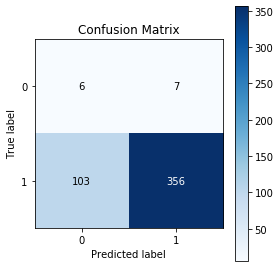


AUC: 0.7052119993296464


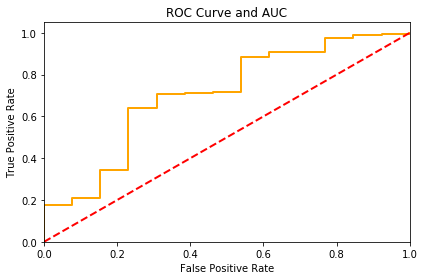

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 1.0
Recall: 0.06535947712418301
Accuracy: 0.09110169491525423
F1_Score: 0.1226993865030675


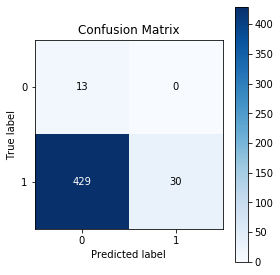


AUC: 0.6680073738897269


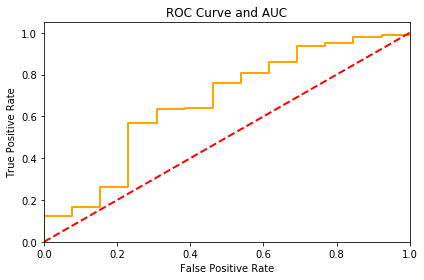

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.9739952718676123
Recall: 0.8976034858387799
Accuracy: 0.8771186440677966
F1_Score: 0.9342403628117913


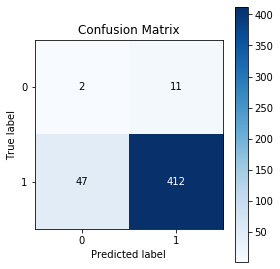


AUC: 0.5257248198424669


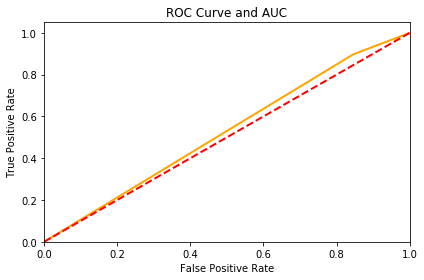

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.9755011135857461
Recall: 0.954248366013072
Accuracy: 0.9322033898305084
F1_Score: 0.9647577092511013


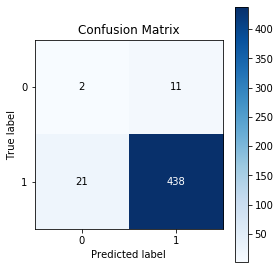


AUC: 0.5540472599296129


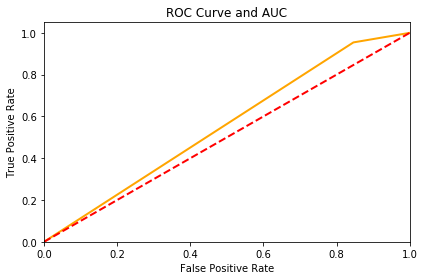

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.972457627118644
Recall: 1.0
Accuracy: 0.972457627118644
F1_Score: 0.9860365198711063


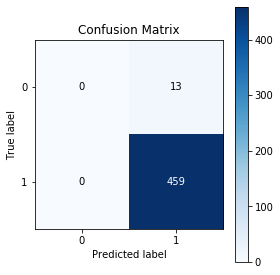


AUC: 0.6713591419473771


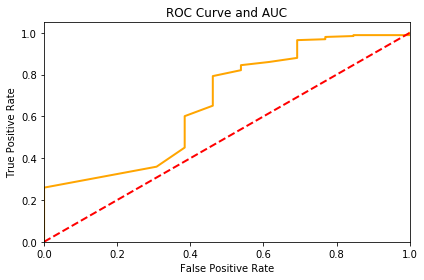

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.979381443298969
Recall: 0.8278867102396514
Accuracy: 0.815677966101695
F1_Score: 0.8972845336481701


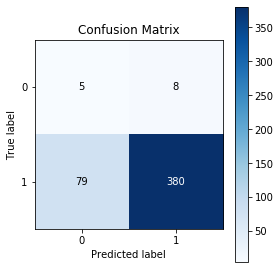


AUC: 0.6475615887380594


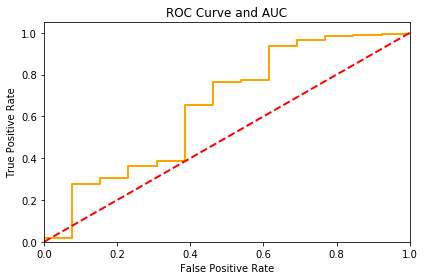

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.9834710743801653
Recall: 0.7777777777777778
Accuracy: 0.7711864406779662
F1_Score: 0.8686131386861314


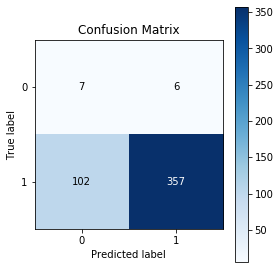

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.9848024316109423
Recall: 0.7058823529411765
Accuracy: 0.7033898305084746
F1_Score: 0.8223350253807107


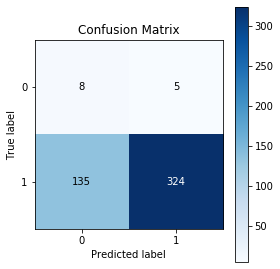


AUC: 0.7037037037037036


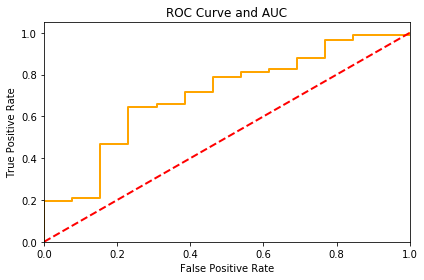

---------------------------------------------------------------------------
 Amphet 
Drug user percent: 38.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.6565656565656566
Recall: 0.7182320441988951
Accuracy: 0.7478813559322034
F1_Score: 0.6860158311345647


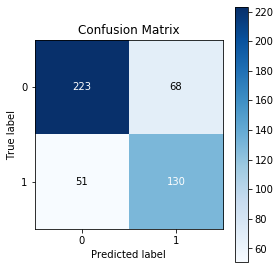


AUC: 0.8019973040192897


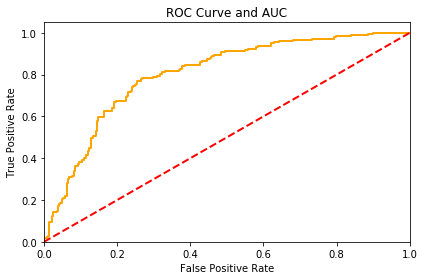

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.4116222760290557
Recall: 0.9392265193370166
Accuracy: 0.461864406779661
F1_Score: 0.5723905723905724


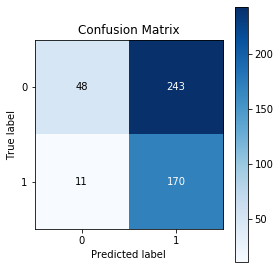


AUC: 0.7536120445786106


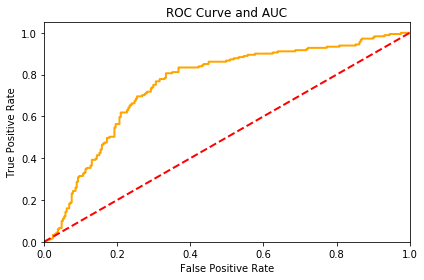

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.5628415300546448
Recall: 0.569060773480663
Accuracy: 0.6652542372881356
F1_Score: 0.5659340659340659


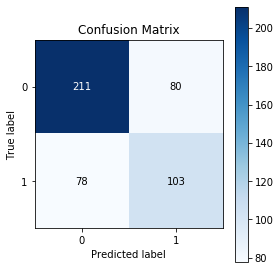


AUC: 0.647073342066792


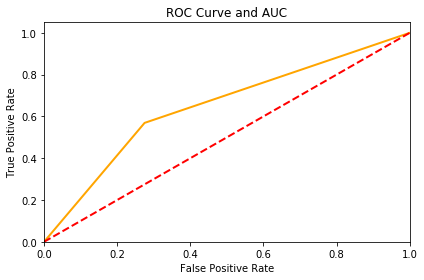

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.5493827160493827
Recall: 0.49171270718232046
Accuracy: 0.6504237288135594
F1_Score: 0.5189504373177843


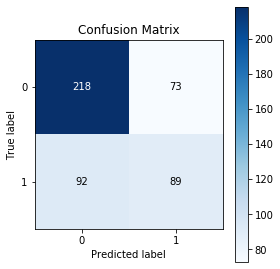


AUC: 0.6204268003265554


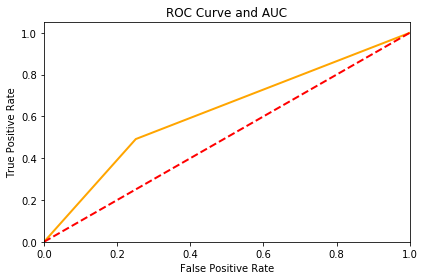

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.6705882352941176
Recall: 0.6298342541436464
Accuracy: 0.739406779661017
F1_Score: 0.6495726495726496


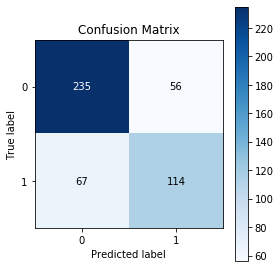


AUC: 0.7911089593894173


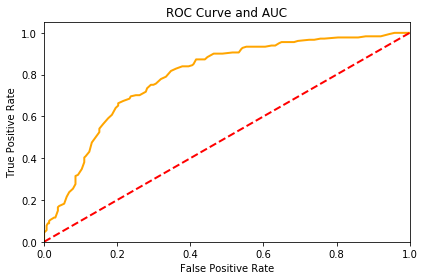

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.6071428571428571
Recall: 0.7513812154696132
Accuracy: 0.7182203389830508
F1_Score: 0.671604938271605


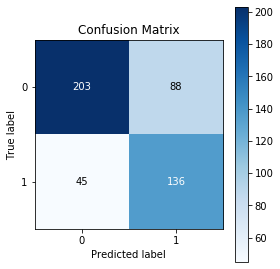


AUC: 0.8003075696303468


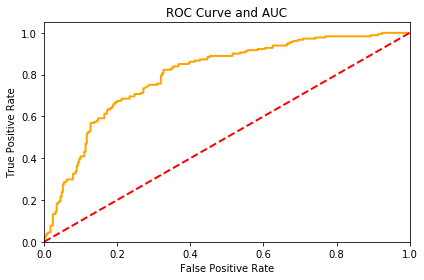

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.6421568627450981
Recall: 0.7237569060773481
Accuracy: 0.739406779661017
F1_Score: 0.6805194805194806


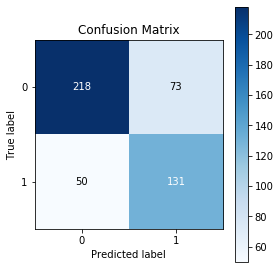

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.5493562231759657
Recall: 0.7071823204419889
Accuracy: 0.6652542372881356
F1_Score: 0.6183574879227054


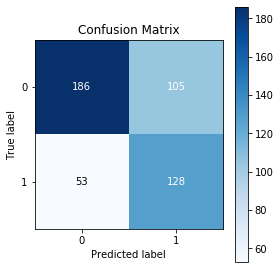


AUC: 0.7468056425737124


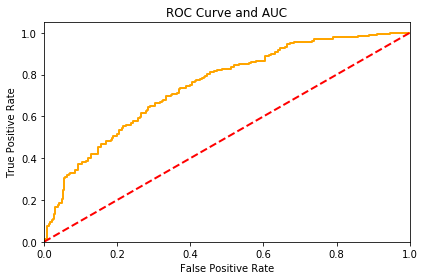

---------------------------------------------------------------------------
 Amyl 
Drug user percent: 18.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.30357142857142855
Recall: 0.6144578313253012
Accuracy: 0.684322033898305
F1_Score: 0.4063745019920319


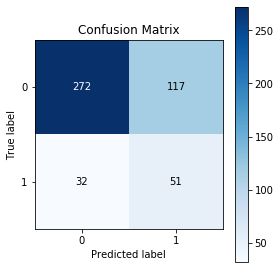


AUC: 0.7182767057949019


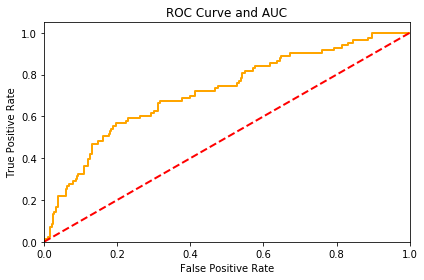

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.1891891891891892
Recall: 0.927710843373494
Accuracy: 0.288135593220339
F1_Score: 0.3142857142857143


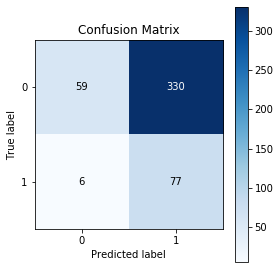


AUC: 0.666150463034658


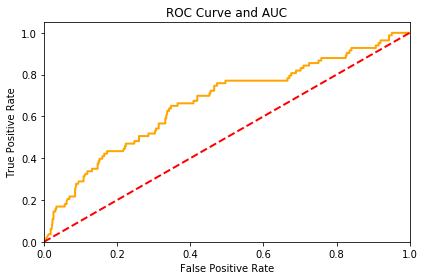

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.34108527131782945
Recall: 0.5301204819277109
Accuracy: 0.7372881355932204
F1_Score: 0.4150943396226415


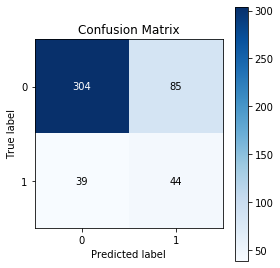


AUC: 0.6558057422492024


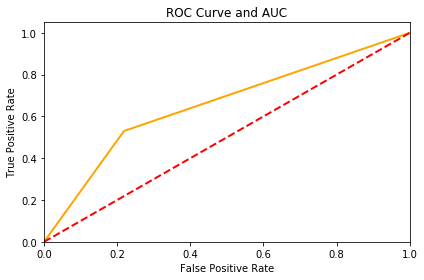

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.20634920634920634
Recall: 0.3132530120481928
Accuracy: 0.6673728813559322
F1_Score: 0.2488038277511961


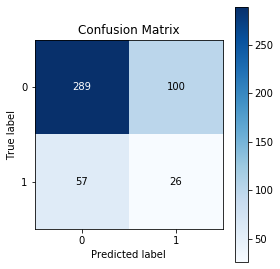


AUC: 0.5280918016539164


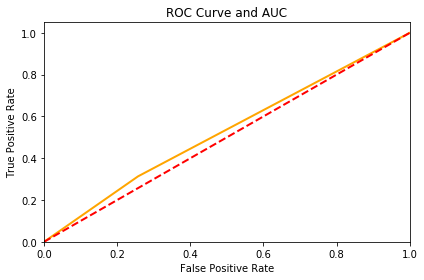

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.40476190476190477
Recall: 0.20481927710843373
Accuracy: 0.8072033898305084
F1_Score: 0.272


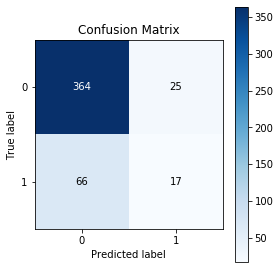


AUC: 0.6977266392046334


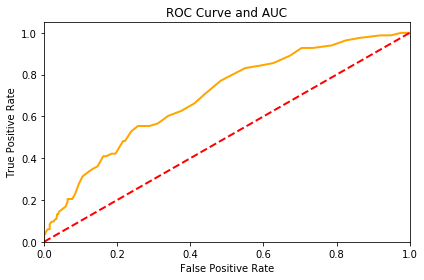

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.33774834437086093
Recall: 0.6144578313253012
Accuracy: 0.7203389830508474
F1_Score: 0.43589743589743585


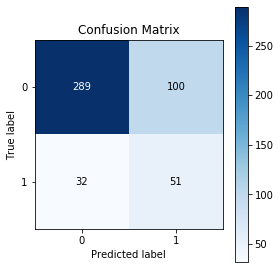


AUC: 0.722055316381206


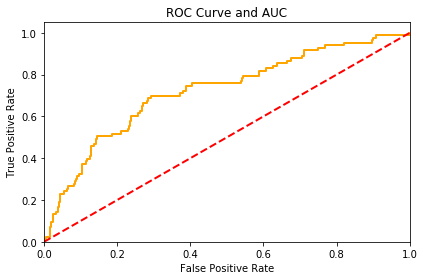

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.30057803468208094
Recall: 0.6265060240963856
Accuracy: 0.6779661016949152
F1_Score: 0.40625


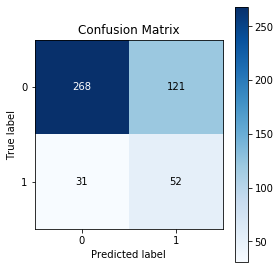

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.3548387096774194
Recall: 0.6626506024096386
Accuracy: 0.7288135593220338
F1_Score: 0.4621848739495799


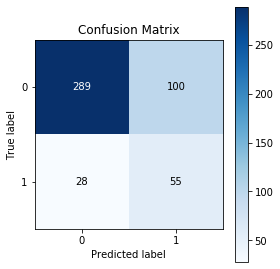


AUC: 0.7373555920339455


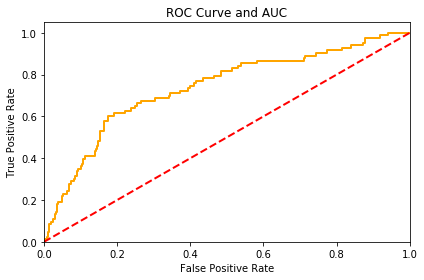

---------------------------------------------------------------------------
 Benzos 
Drug user percent: 39.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.6206896551724138
Recall: 0.6847826086956522
Accuracy: 0.7139830508474576
F1_Score: 0.6511627906976745


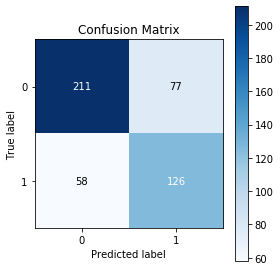


AUC: 0.7675309480676328


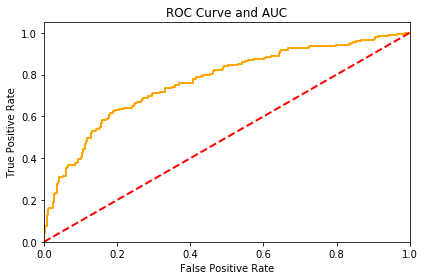

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.5812807881773399
Recall: 0.6413043478260869
Accuracy: 0.6800847457627118
F1_Score: 0.6098191214470284


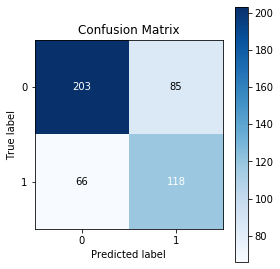


AUC: 0.7161269625603865


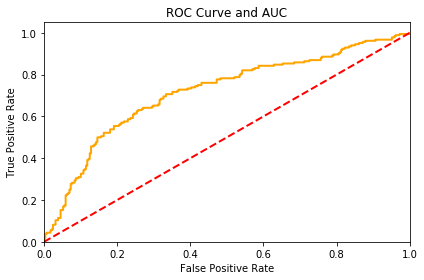

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.5326633165829145
Recall: 0.5760869565217391
Accuracy: 0.6377118644067796
F1_Score: 0.5535248041775457


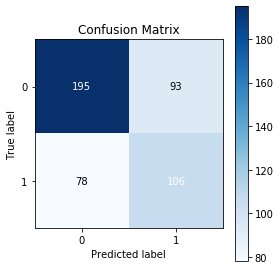


AUC: 0.6265851449275363


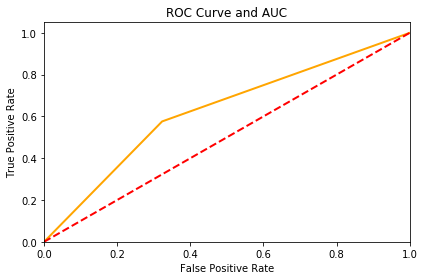

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.5094339622641509
Recall: 0.5869565217391305
Accuracy: 0.6186440677966102
F1_Score: 0.5454545454545454


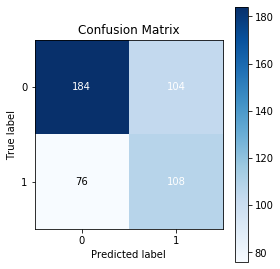


AUC: 0.6129227053140096


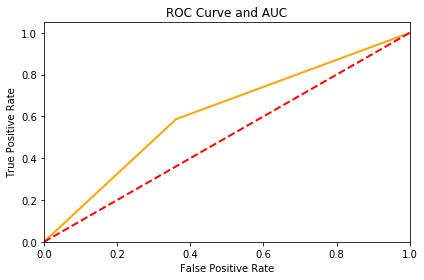

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.5803108808290155
Recall: 0.6086956521739131
Accuracy: 0.6758474576271186
F1_Score: 0.5941644562334217


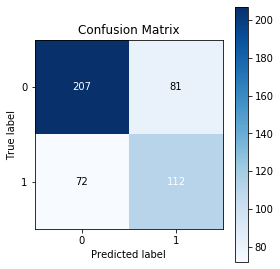


AUC: 0.7489338013285024


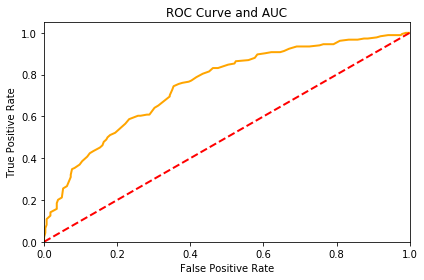

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.5972222222222222
Recall: 0.7010869565217391
Accuracy: 0.6991525423728814
F1_Score: 0.645


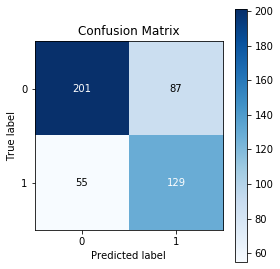


AUC: 0.7689085144927537


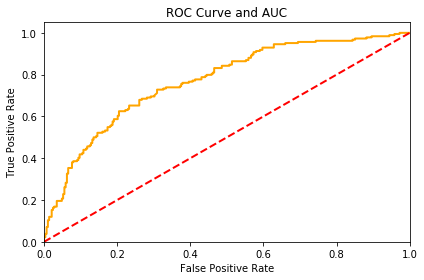

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.634020618556701
Recall: 0.6684782608695652
Accuracy: 0.7203389830508474
F1_Score: 0.6507936507936508


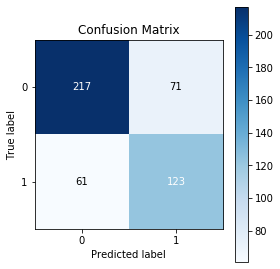

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.5921787709497207
Recall: 0.5760869565217391
Accuracy: 0.6800847457627118
F1_Score: 0.5840220385674931


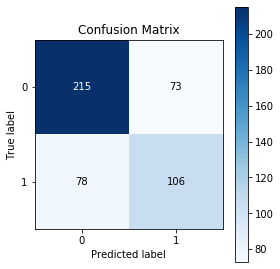


AUC: 0.7219957729468599


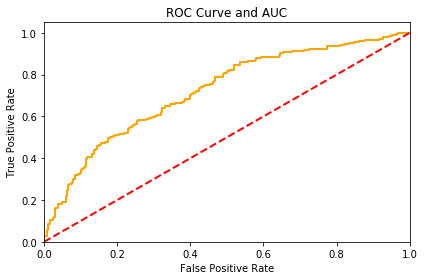

---------------------------------------------------------------------------
 Caffeine 
Drug user percent: 97.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.9705882352941176
Recall: 0.7960526315789473
Accuracy: 0.7796610169491526
F1_Score: 0.8746987951807228


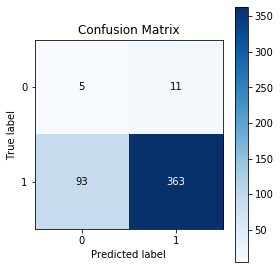


AUC: 0.5623629385964912


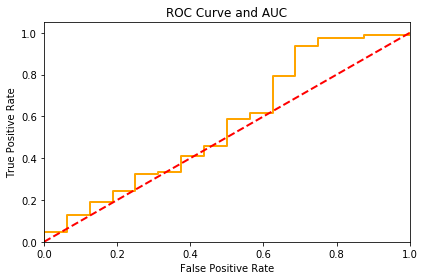

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.9454545454545454
Recall: 0.22807017543859648
Accuracy: 0.24152542372881355
F1_Score: 0.3674911660777385


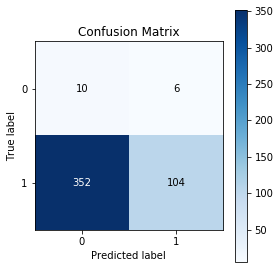


AUC: 0.5217927631578948


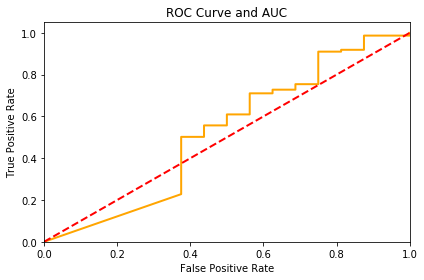

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.9658314350797267
Recall: 0.9298245614035088
Accuracy: 0.9004237288135594
F1_Score: 0.9474860335195531


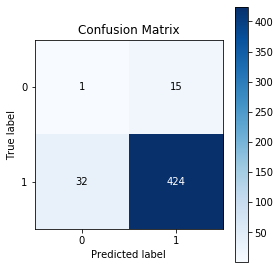


AUC: 0.4961622807017544


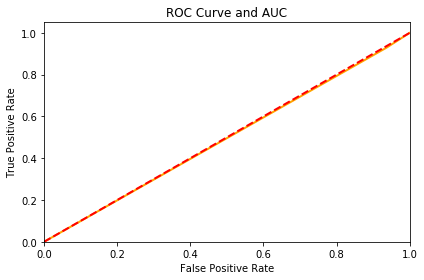

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.9716157205240175
Recall: 0.9758771929824561
Accuracy: 0.9491525423728814
F1_Score: 0.973741794310722


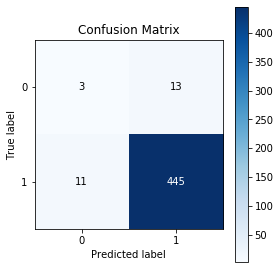


AUC: 0.5816885964912281


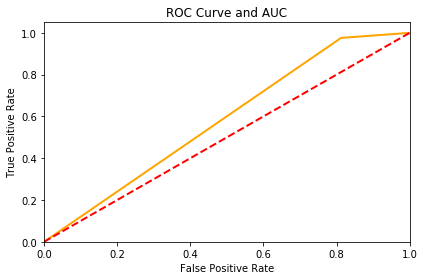

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.9658119658119658
Recall: 0.9912280701754386
Accuracy: 0.9576271186440678
F1_Score: 0.9783549783549784


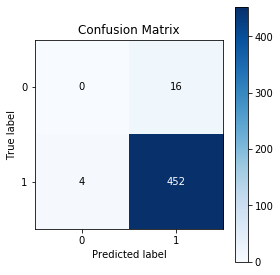


AUC: 0.6812637061403509


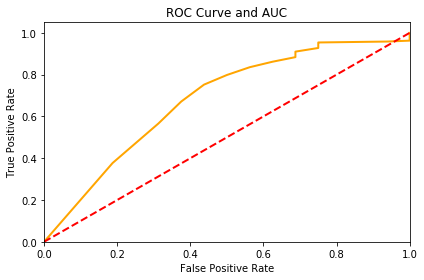

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.9709443099273608
Recall: 0.8793859649122807
Accuracy: 0.8580508474576272
F1_Score: 0.9228998849252015


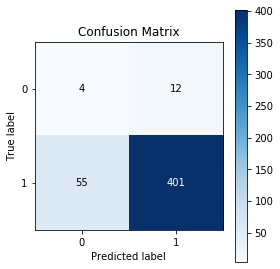


AUC: 0.6206140350877193


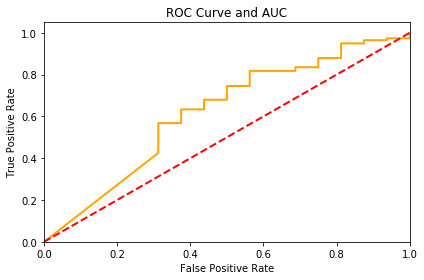

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.9728997289972899
Recall: 0.7872807017543859
Accuracy: 0.7733050847457628
F1_Score: 0.8703030303030302


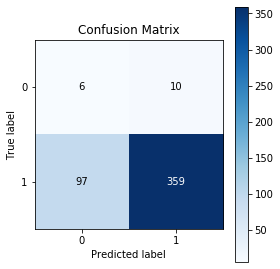

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.9708994708994709
Recall: 0.8048245614035088
Accuracy: 0.788135593220339
F1_Score: 0.880095923261391


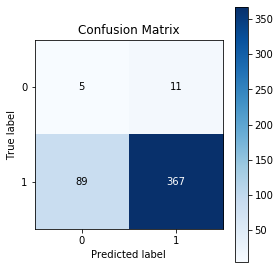


AUC: 0.5790844298245614


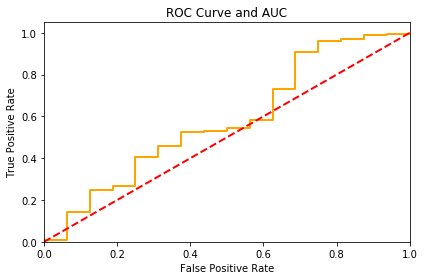

---------------------------------------------------------------------------
 Cannabis 
Drug user percent: 65.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.9
Recall: 0.7572815533980582
Accuracy: 0.7860169491525424
F1_Score: 0.8224956063268892


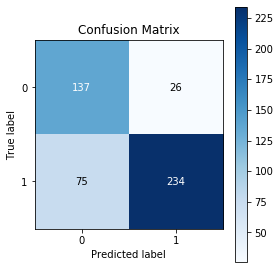


AUC: 0.8833164572041218


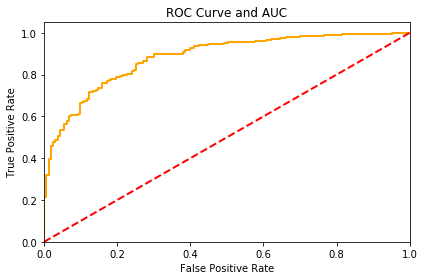

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.8846153846153846
Recall: 0.22330097087378642
Accuracy: 0.4724576271186441
F1_Score: 0.35658914728682173


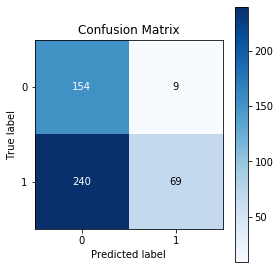


AUC: 0.8032441876625569


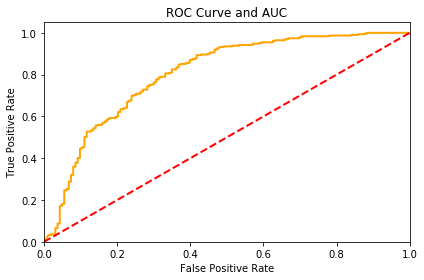

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.823728813559322
Recall: 0.7864077669902912
Accuracy: 0.75
F1_Score: 0.804635761589404


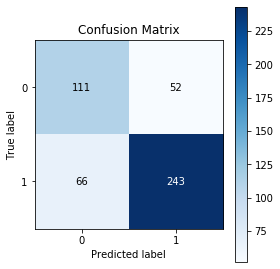


AUC: 0.733694681041158


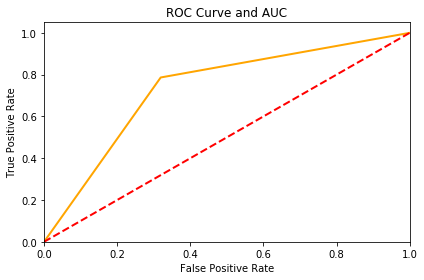

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.8120805369127517
Recall: 0.7831715210355987
Accuracy: 0.739406779661017
F1_Score: 0.7973640856672158


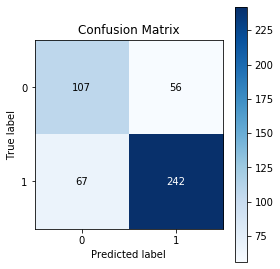


AUC: 0.7198066194135049


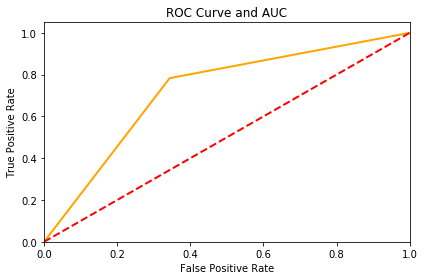

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.8547854785478548
Recall: 0.8381877022653722
Accuracy: 0.8008474576271186
F1_Score: 0.8464052287581699


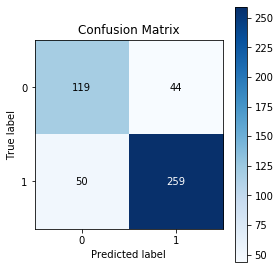


AUC: 0.8793456032719837


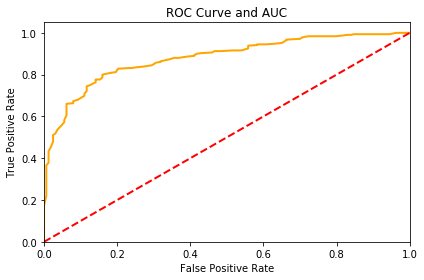

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.9149797570850202
Recall: 0.7313915857605178
Accuracy: 0.7796610169491526
F1_Score: 0.8129496402877697


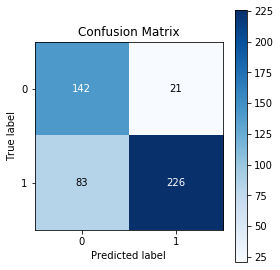


AUC: 0.8722774832727778


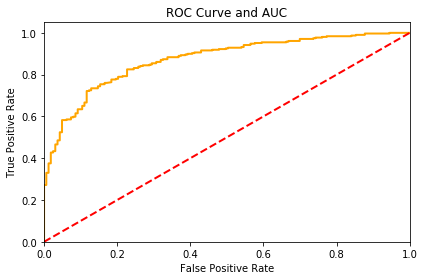

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.9051383399209486
Recall: 0.7411003236245954
Accuracy: 0.7796610169491526
F1_Score: 0.8149466192170818


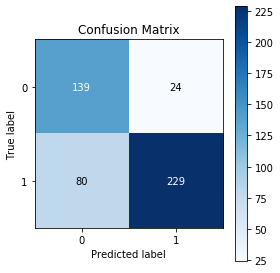

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.8893805309734514
Recall: 0.6504854368932039
Accuracy: 0.7182203389830508
F1_Score: 0.7514018691588785


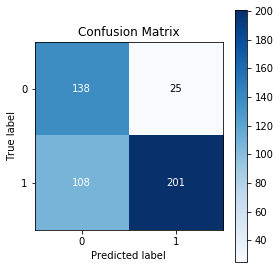


AUC: 0.8240514622669605


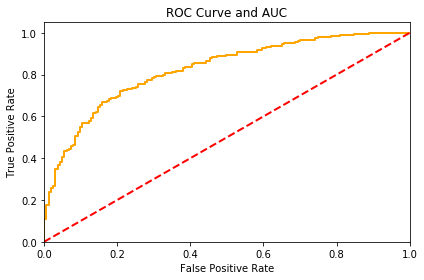

---------------------------------------------------------------------------
 Chocolate 
Drug user percent: 99.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.9869451697127938
Recall: 0.8111587982832618
Accuracy: 0.8029661016949152
F1_Score: 0.8904593639575972


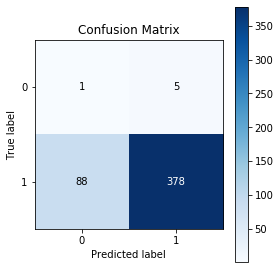


AUC: 0.44134477825464946


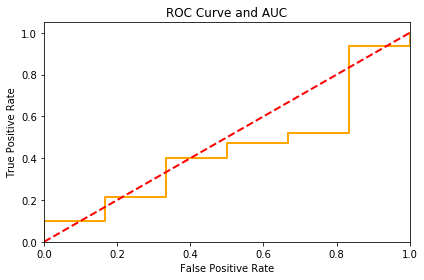

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 1.0
Recall: 0.0407725321888412
Accuracy: 0.05296610169491525
F1_Score: 0.07835051546391752


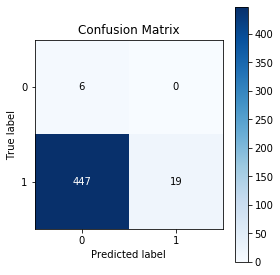


AUC: 0.6223175965665235


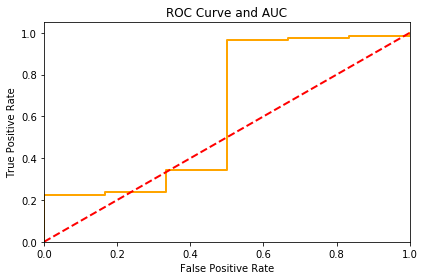

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.9864253393665159
Recall: 0.9356223175965666
Accuracy: 0.923728813559322
F1_Score: 0.960352422907489


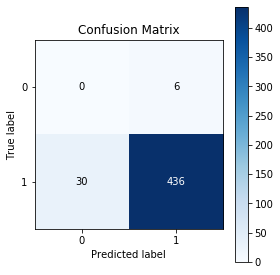


AUC: 0.4678111587982833


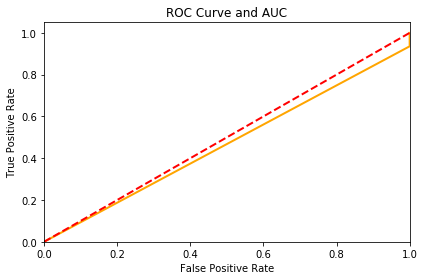

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.9867549668874173
Recall: 0.9592274678111588
Accuracy: 0.9470338983050848
F1_Score: 0.9727965179542981


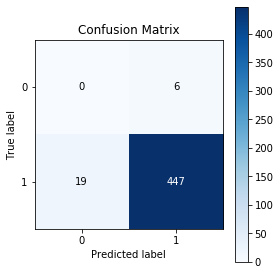


AUC: 0.4796137339055794


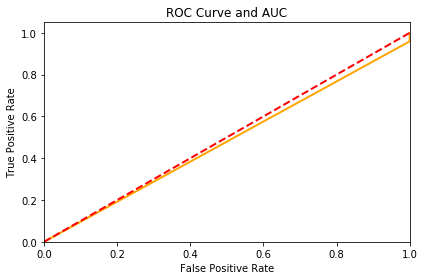

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.9872881355932204
Recall: 1.0
Accuracy: 0.9872881355932204
F1_Score: 0.9936034115138593


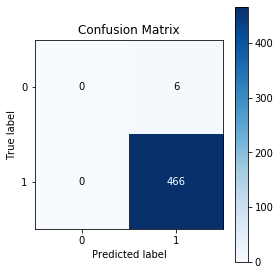


AUC: 0.18454935622317598


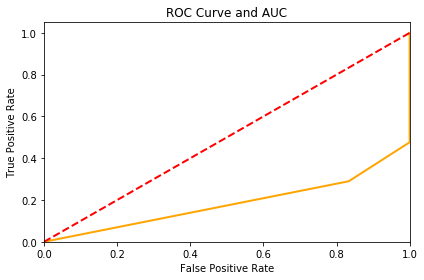

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.9880668257756563
Recall: 0.8884120171673819
Accuracy: 0.8792372881355932
F1_Score: 0.9355932203389831


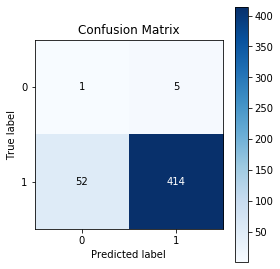


AUC: 0.5398783977110158


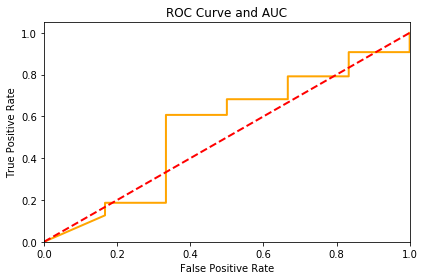

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.9867724867724867
Recall: 0.8004291845493562
Accuracy: 0.7923728813559322
F1_Score: 0.8838862559241706


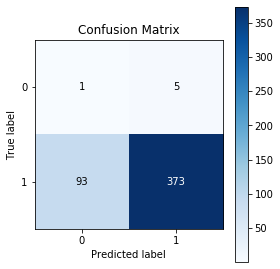

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.9863013698630136
Recall: 0.7725321888412017
Accuracy: 0.7648305084745762
F1_Score: 0.8664259927797834


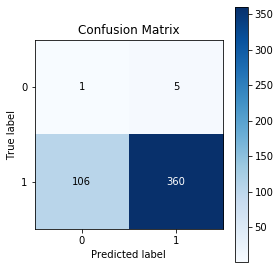


AUC: 0.5214592274678111


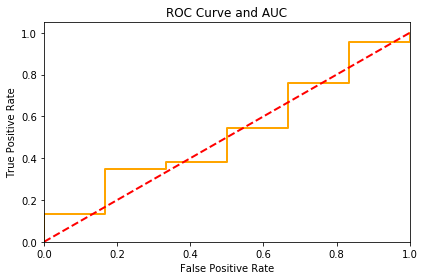

---------------------------------------------------------------------------
 Cocaine 


/Users/bengeissel/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Drug user percent: 36.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.5141509433962265
Recall: 0.6337209302325582
Accuracy: 0.6483050847457628
F1_Score: 0.5677083333333333


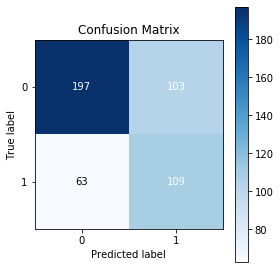


AUC: 0.7117635658914727


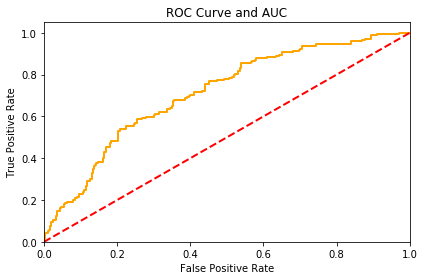

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.4197860962566845
Recall: 0.9127906976744186
Accuracy: 0.5084745762711864
F1_Score: 0.575091575091575


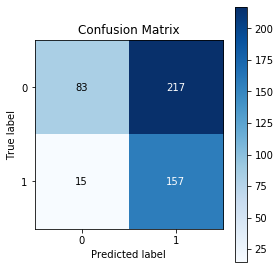


AUC: 0.670968992248062


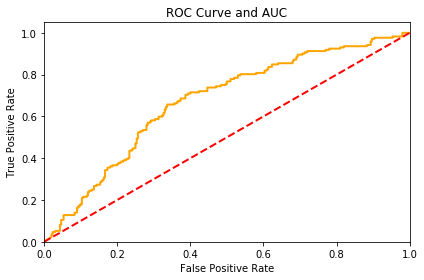

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.48148148148148145
Recall: 0.5290697674418605
Accuracy: 0.6207627118644068
F1_Score: 0.5041551246537397


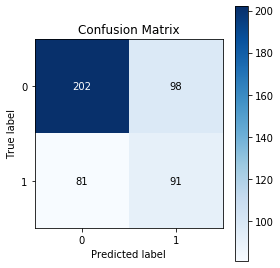


AUC: 0.6012015503875969


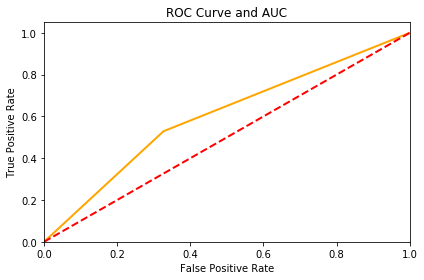

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.49171270718232046
Recall: 0.5174418604651163
Accuracy: 0.6292372881355932
F1_Score: 0.5042492917847027


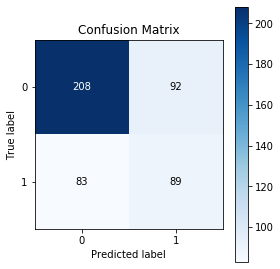


AUC: 0.6053875968992248


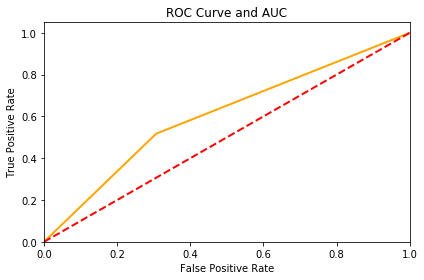

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.5294117647058824
Recall: 0.47093023255813954
Accuracy: 0.6546610169491526
F1_Score: 0.49846153846153846


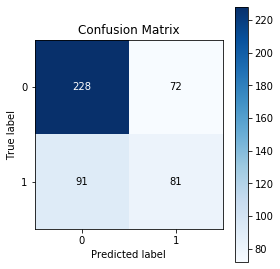


AUC: 0.7098158914728682


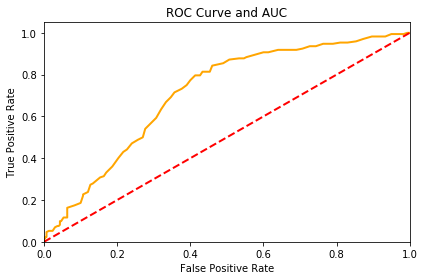

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.5258620689655172
Recall: 0.7093023255813954
Accuracy: 0.6610169491525424
F1_Score: 0.603960396039604


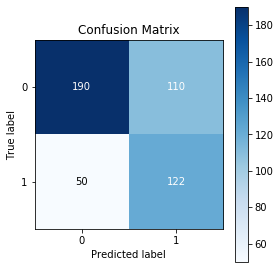


AUC: 0.7208430232558141


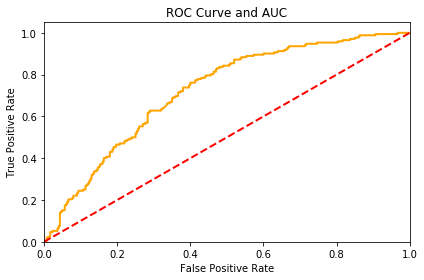

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.5480769230769231
Recall: 0.6627906976744186
Accuracy: 0.6779661016949152
F1_Score: 0.6


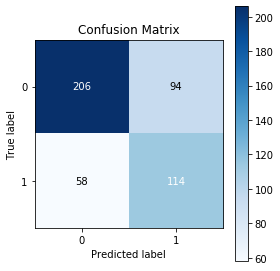

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.5254237288135594
Recall: 0.5406976744186046
Accuracy: 0.6546610169491526
F1_Score: 0.5329512893982807


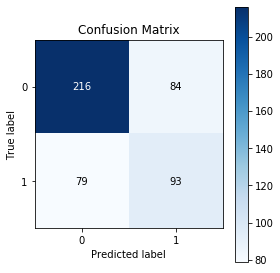


AUC: 0.6666279069767441


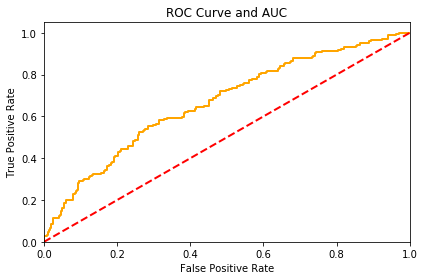

---------------------------------------------------------------------------
 Crack 
Drug user percent: 8.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.16417910447761194
Recall: 0.5789473684210527
Accuracy: 0.7288135593220338
F1_Score: 0.2558139534883721


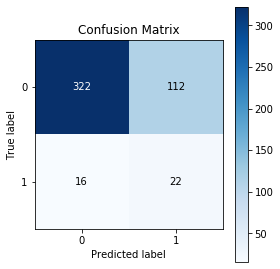


AUC: 0.7497574581615329


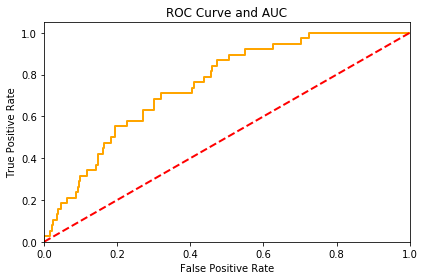

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.08665105386416862
Recall: 0.9736842105263158
Accuracy: 0.1716101694915254
F1_Score: 0.15913978494623657


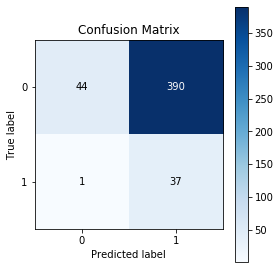


AUC: 0.6441304875090953


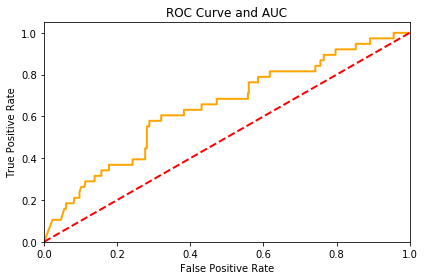

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.12121212121212122
Recall: 0.3157894736842105
Accuracy: 0.760593220338983
F1_Score: 0.17518248175182483


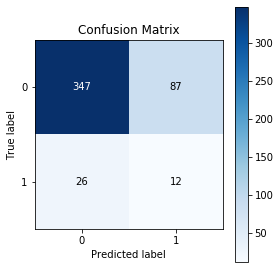


AUC: 0.5576643220955615


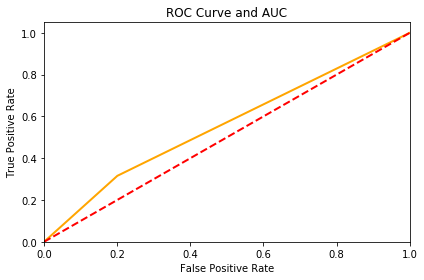

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.14925373134328357
Recall: 0.2631578947368421
Accuracy: 0.8199152542372882
F1_Score: 0.19047619047619044


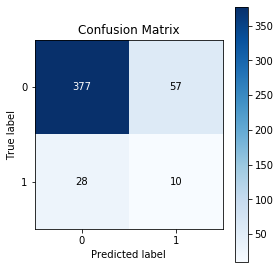


AUC: 0.565910744603444


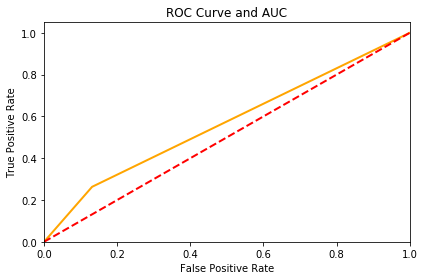

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.1111111111111111
Recall: 0.07894736842105263
Accuracy: 0.875
F1_Score: 0.09230769230769231


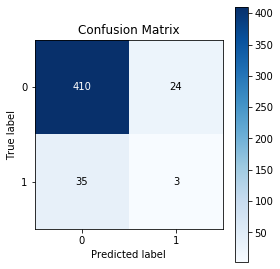


AUC: 0.6684756245452341


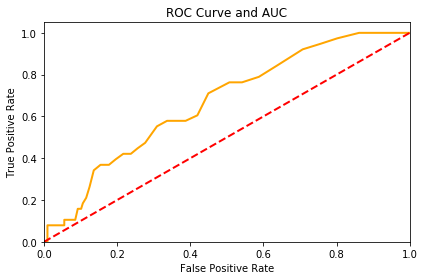

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.16279069767441862
Recall: 0.5526315789473685
Accuracy: 0.7351694915254238
F1_Score: 0.251497005988024


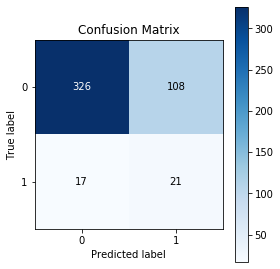


AUC: 0.7347804996361872


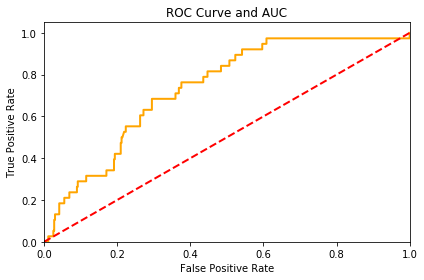

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.18055555555555555
Recall: 0.6842105263157895
Accuracy: 0.7245762711864406
F1_Score: 0.2857142857142857


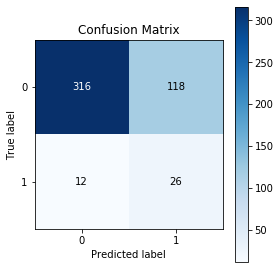

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.16083916083916083
Recall: 0.6052631578947368
Accuracy: 0.7139830508474576
F1_Score: 0.2541436464088398


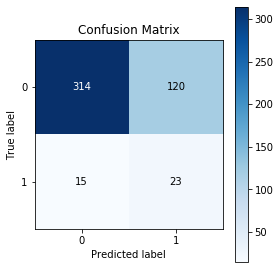


AUC: 0.7462406015037595


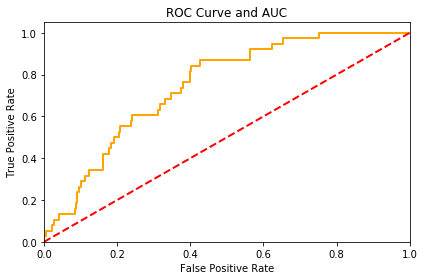

---------------------------------------------------------------------------
 Ecstacy 


/Users/bengeissel/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Drug user percent: 39.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.6568627450980392
Recall: 0.7204301075268817
Accuracy: 0.7415254237288136
F1_Score: 0.6871794871794871


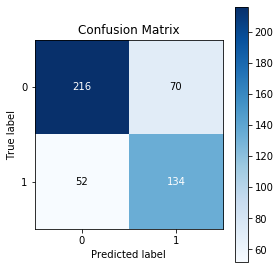


AUC: 0.8162455823746146


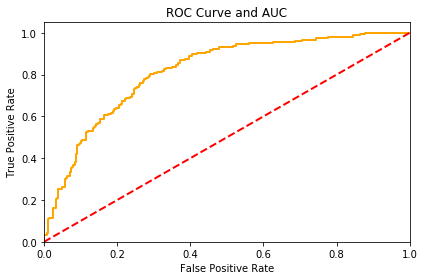

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.42992874109263657
Recall: 0.9731182795698925
Accuracy: 0.4809322033898305
F1_Score: 0.5963756177924218


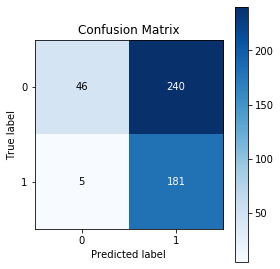


AUC: 0.7498214151439959


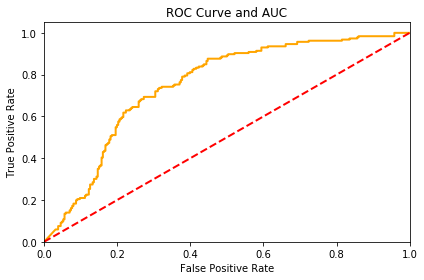

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.5902439024390244
Recall: 0.6505376344086021
Accuracy: 0.684322033898305
F1_Score: 0.6189258312020459


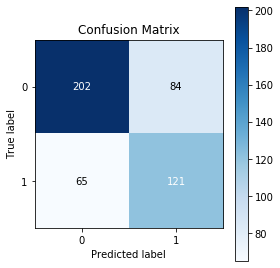


AUC: 0.6784156703511541


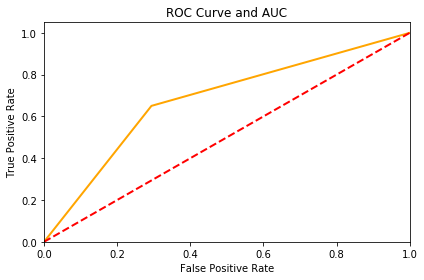

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.5355191256830601
Recall: 0.5268817204301075
Accuracy: 0.6334745762711864
F1_Score: 0.5311653116531165


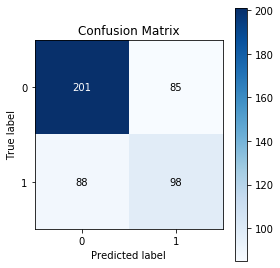


AUC: 0.6148394616136552


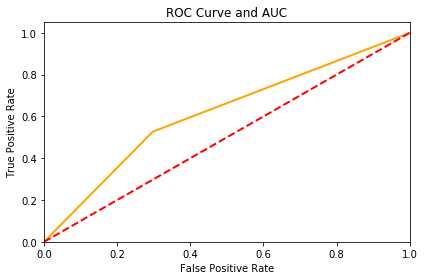

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.6578947368421053
Recall: 0.6720430107526881
Accuracy: 0.7330508474576272
F1_Score: 0.6648936170212766


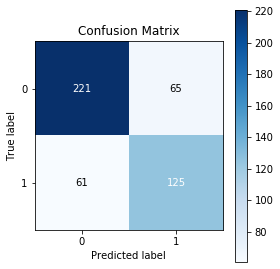


AUC: 0.799778178810437


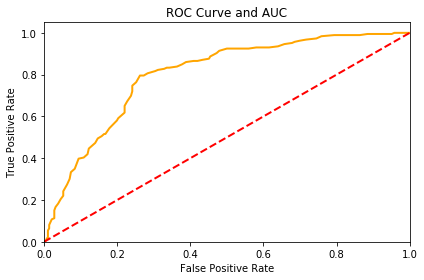

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.6431718061674009
Recall: 0.7849462365591398
Accuracy: 0.7436440677966102
F1_Score: 0.7070217917675546


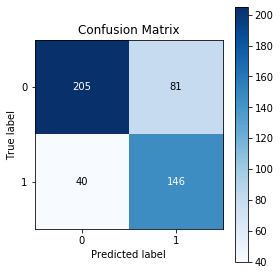


AUC: 0.8163113767952477


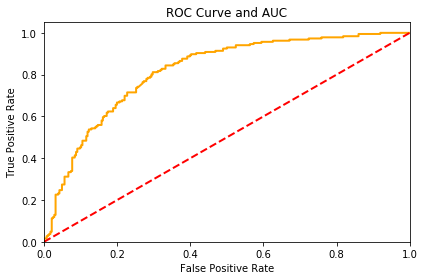

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.6649746192893401
Recall: 0.7043010752688172
Accuracy: 0.7436440677966102
F1_Score: 0.6840731070496084


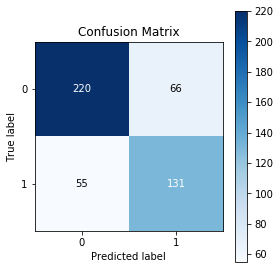

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.584
Recall: 0.7849462365591398
Accuracy: 0.6949152542372882
F1_Score: 0.6697247706422018


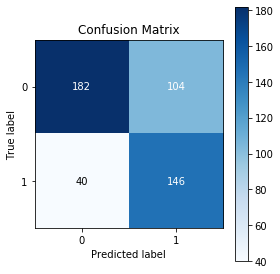


AUC: 0.8004925182344538


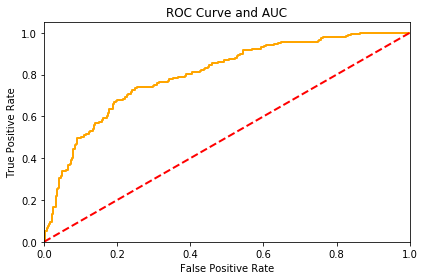

---------------------------------------------------------------------------
 Heroin 
Drug user percent: 11.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.2867132867132867
Recall: 0.7592592592592593
Accuracy: 0.7563559322033898
F1_Score: 0.41624365482233505


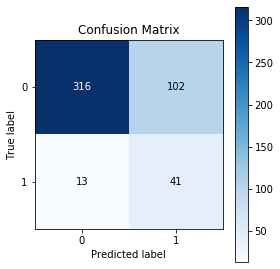


AUC: 0.8341307814992026


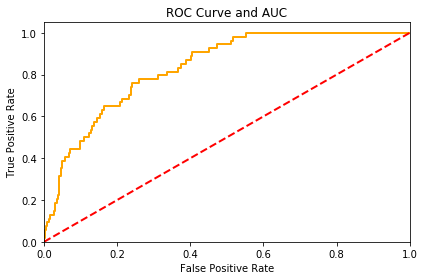

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.12531969309462915
Recall: 0.9074074074074074
Accuracy: 0.2648305084745763
F1_Score: 0.22022471910112357


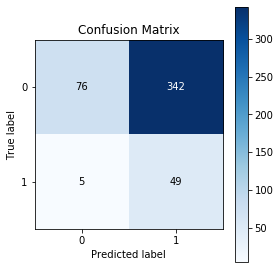


AUC: 0.7399432925748717


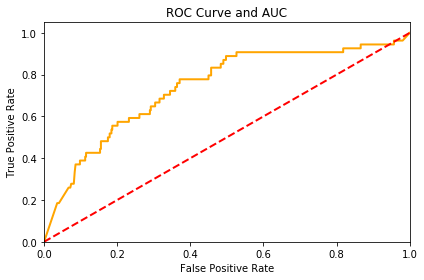

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.18604651162790697
Recall: 0.2962962962962963
Accuracy: 0.7711864406779662
F1_Score: 0.22857142857142856


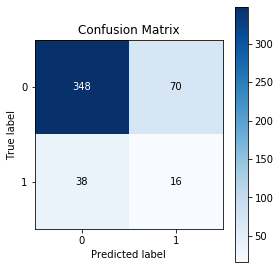


AUC: 0.5644160907318803


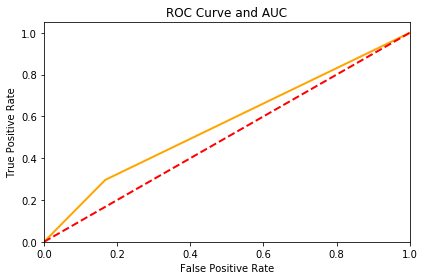

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.25
Recall: 0.25925925925925924
Accuracy: 0.826271186440678
F1_Score: 0.2545454545454545


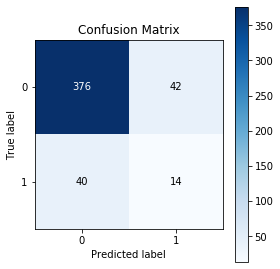


AUC: 0.5793903951798689


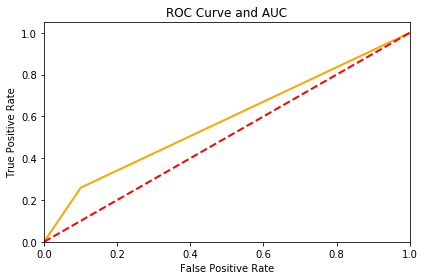

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.48148148148148145
Recall: 0.24074074074074073
Accuracy: 0.8834745762711864
F1_Score: 0.3209876543209876


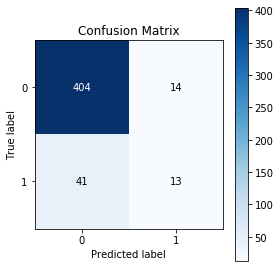


AUC: 0.7942805245436825


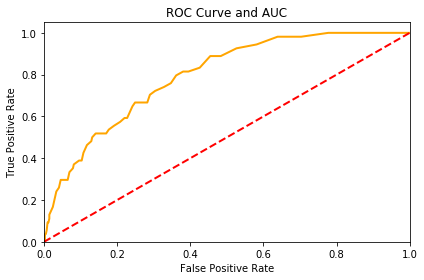

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.2677165354330709
Recall: 0.6296296296296297
Accuracy: 0.760593220338983
F1_Score: 0.3756906077348066


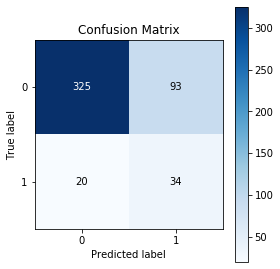


AUC: 0.8129984051036683


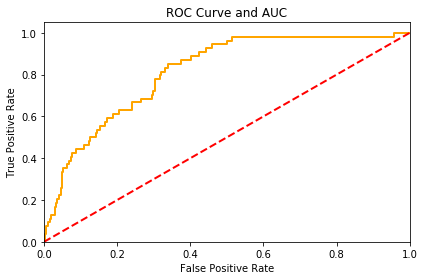

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.2753623188405797
Recall: 0.7037037037037037
Accuracy: 0.7542372881355932
F1_Score: 0.3958333333333333


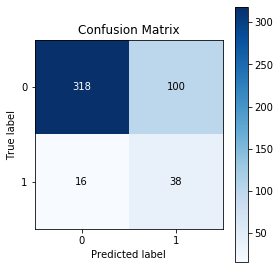

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.2585034013605442
Recall: 0.7037037037037037
Accuracy: 0.7351694915254238
F1_Score: 0.3781094527363184


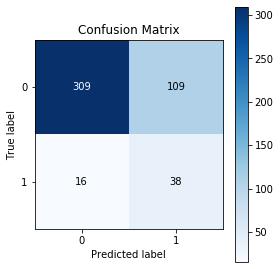


AUC: 0.7925748715222398


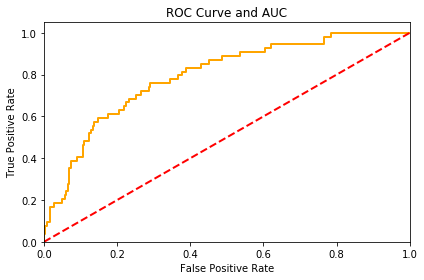

---------------------------------------------------------------------------
 Ketamine 
Drug user percent: 20.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.40782122905027934
Recall: 0.7849462365591398
Accuracy: 0.7330508474576272
F1_Score: 0.5367647058823529


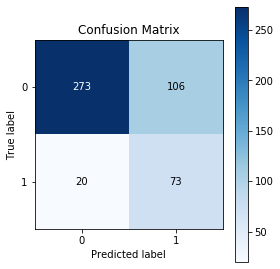


AUC: 0.8139416120520896


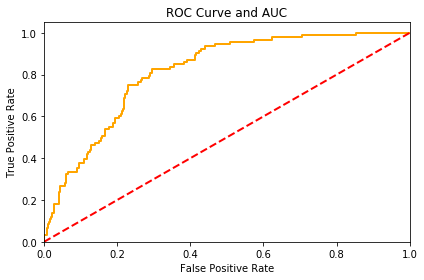

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.22193877551020408
Recall: 0.9354838709677419
Accuracy: 0.3411016949152542
F1_Score: 0.3587628865979381


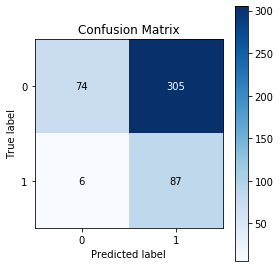


AUC: 0.7496808238999064


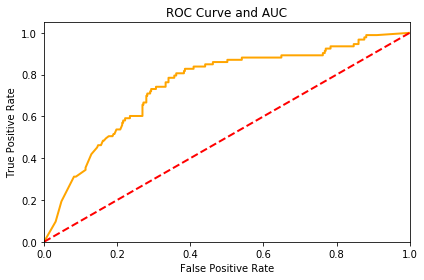

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.3203125
Recall: 0.44086021505376344
Accuracy: 0.7055084745762712
F1_Score: 0.3710407239819004


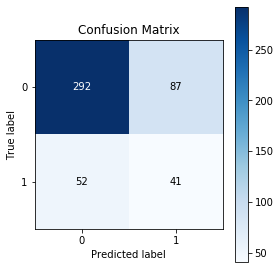


AUC: 0.6056543819332142


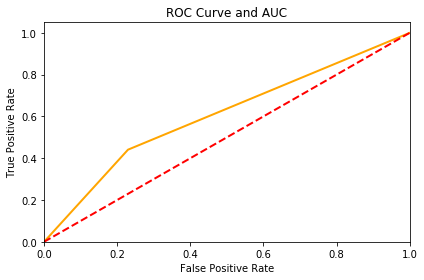

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.3411764705882353
Recall: 0.3118279569892473
Accuracy: 0.7457627118644068
F1_Score: 0.32584269662921345


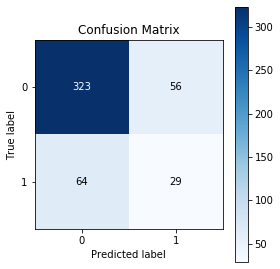


AUC: 0.5820353505262859


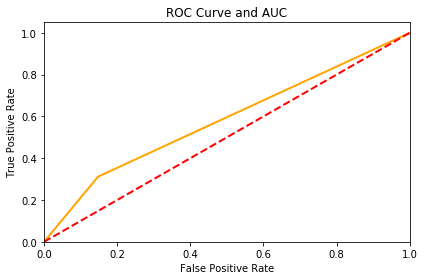

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.5294117647058824
Recall: 0.1935483870967742
Accuracy: 0.8072033898305084
F1_Score: 0.28346456692913385


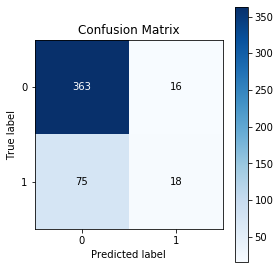


AUC: 0.7753567679518825


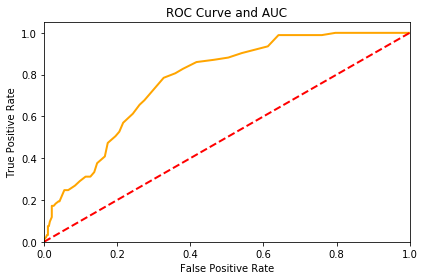

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.37267080745341613
Recall: 0.6451612903225806
Accuracy: 0.7161016949152542
F1_Score: 0.47244094488188976


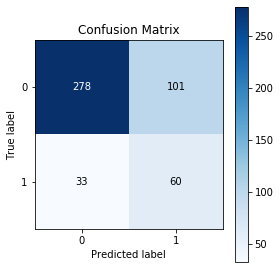


AUC: 0.7637245723040258


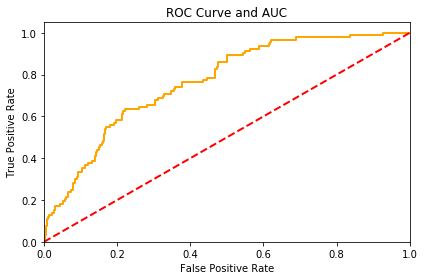

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.3837837837837838
Recall: 0.7634408602150538
Accuracy: 0.711864406779661
F1_Score: 0.5107913669064748


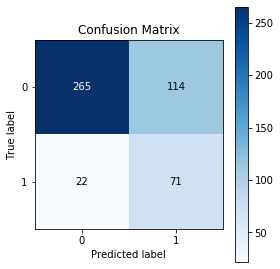

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.34806629834254144
Recall: 0.6774193548387096
Accuracy: 0.6864406779661016
F1_Score: 0.45985401459854014


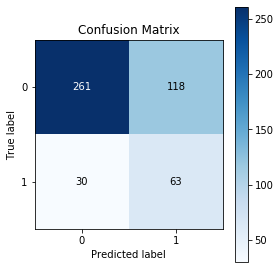


AUC: 0.7398927568303686


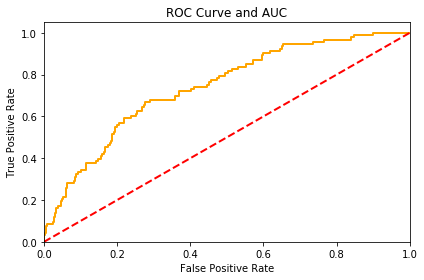

---------------------------------------------------------------------------
 Legal_highs 
Drug user percent: 43.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.7607655502392344
Recall: 0.7871287128712872
Accuracy: 0.8029661016949152
F1_Score: 0.7737226277372261


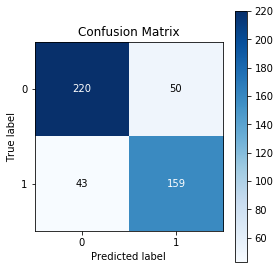


AUC: 0.8793912724605795


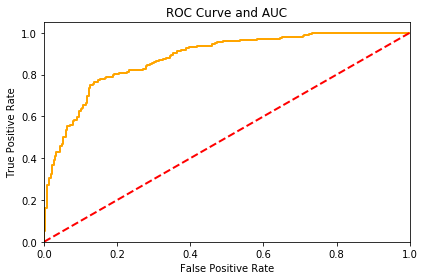

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.7046413502109705
Recall: 0.8267326732673267
Accuracy: 0.777542372881356
F1_Score: 0.7608200455580867


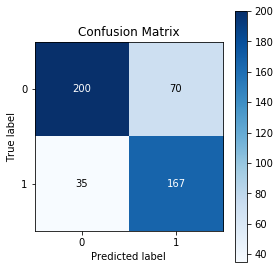


AUC: 0.8194719471947194


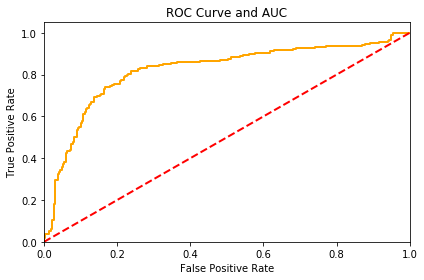

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.6523605150214592
Recall: 0.7524752475247525
Accuracy: 0.722457627118644
F1_Score: 0.6988505747126437


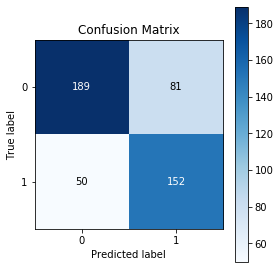


AUC: 0.7262376237623762


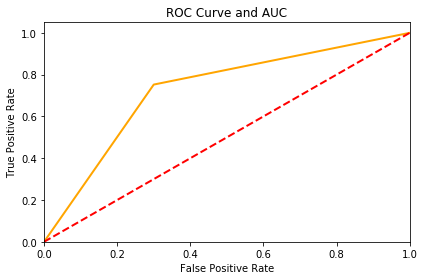

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.6631016042780749
Recall: 0.6138613861386139
Accuracy: 0.701271186440678
F1_Score: 0.6375321336760925


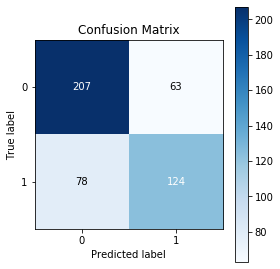


AUC: 0.6902640264026403


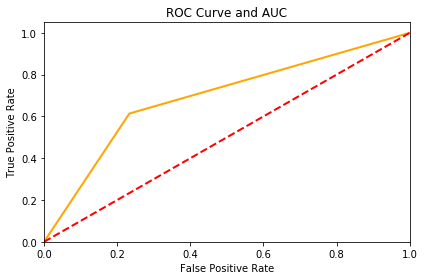

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.7795698924731183
Recall: 0.7178217821782178
Accuracy: 0.7923728813559322
F1_Score: 0.7474226804123711


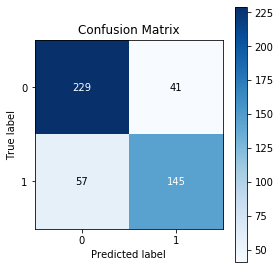


AUC: 0.8688027136046939


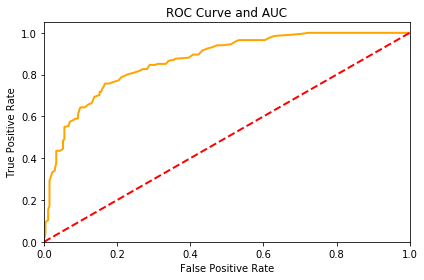

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.7619047619047619
Recall: 0.7920792079207921
Accuracy: 0.8050847457627118
F1_Score: 0.7766990291262137


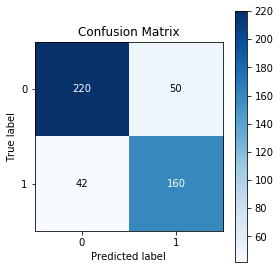


AUC: 0.8719196919691969


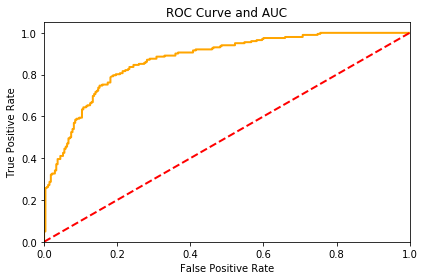

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.7619047619047619
Recall: 0.7920792079207921
Accuracy: 0.8050847457627118
F1_Score: 0.7766990291262137


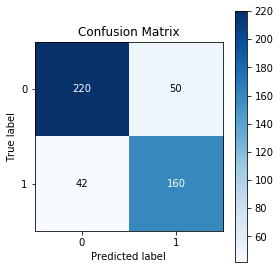

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.689922480620155
Recall: 0.8811881188118812
Accuracy: 0.7796610169491526
F1_Score: 0.7739130434782608


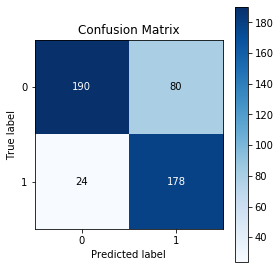


AUC: 0.8839017235056839


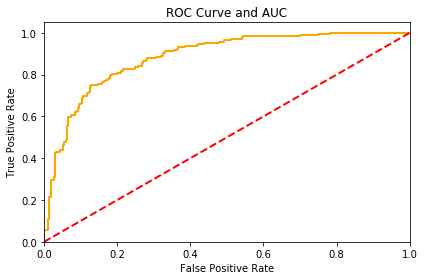

---------------------------------------------------------------------------
 LSD 
Drug user percent: 28.000000000000004%

Logisitic Regression Results:

Model Metrics:
Precision: 0.5538461538461539
Recall: 0.8181818181818182
Accuracy: 0.7648305084745762
F1_Score: 0.6605504587155965


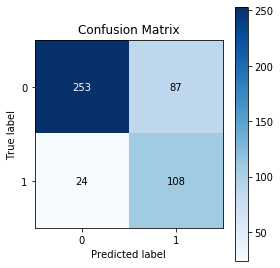


AUC: 0.845788770053476


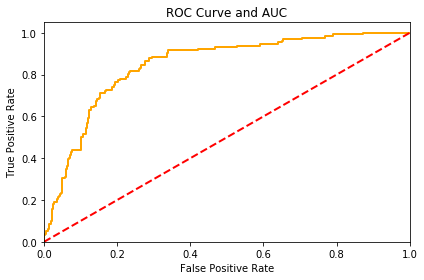

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.4824561403508772
Recall: 0.8333333333333334
Accuracy: 0.7033898305084746
F1_Score: 0.611111111111111


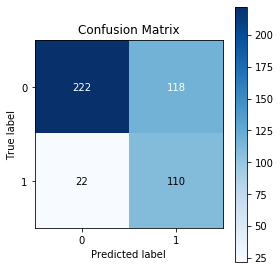


AUC: 0.7801470588235294


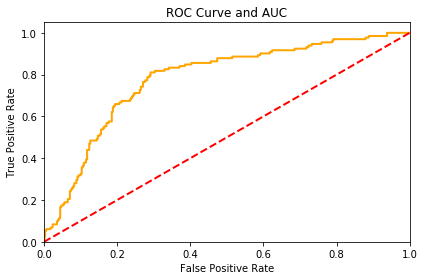

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.4342857142857143
Recall: 0.5757575757575758
Accuracy: 0.6716101694915254
F1_Score: 0.49511400651465803


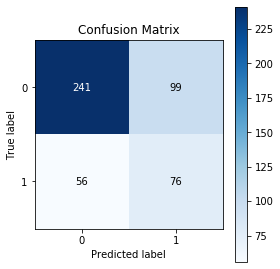


AUC: 0.6422905525846702


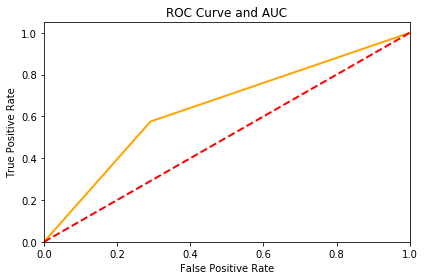

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.44936708860759494
Recall: 0.5378787878787878
Accuracy: 0.6864406779661016
F1_Score: 0.48965517241379314


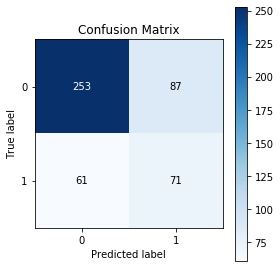


AUC: 0.6409982174688057


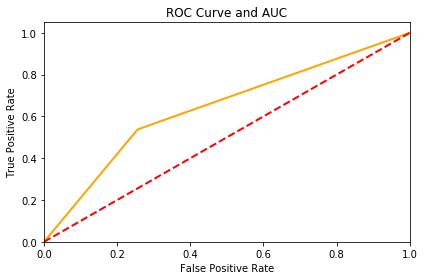

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.5849056603773585
Recall: 0.7045454545454546
Accuracy: 0.777542372881356
F1_Score: 0.6391752577319587


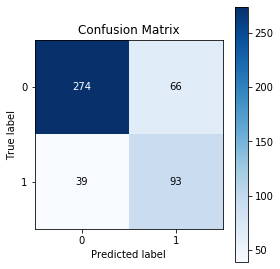


AUC: 0.8286430481283422


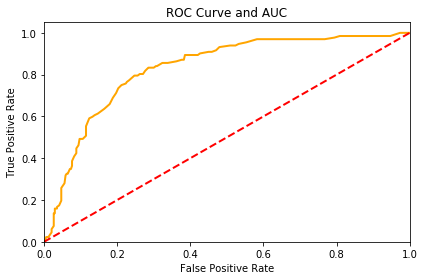

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.5388349514563107
Recall: 0.8409090909090909
Accuracy: 0.7542372881355932
F1_Score: 0.6568047337278107


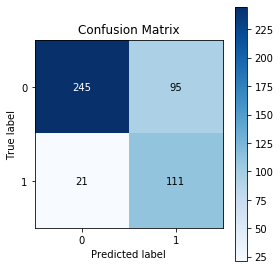


AUC: 0.8411987522281641


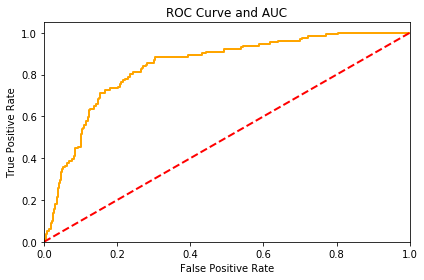

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.5422885572139303
Recall: 0.8257575757575758
Accuracy: 0.7563559322033898
F1_Score: 0.6546546546546547


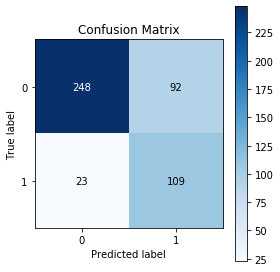

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.4784688995215311
Recall: 0.7575757575757576
Accuracy: 0.701271186440678
F1_Score: 0.5865102639296187


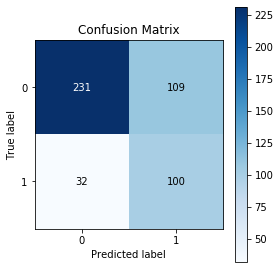


AUC: 0.7852495543672013


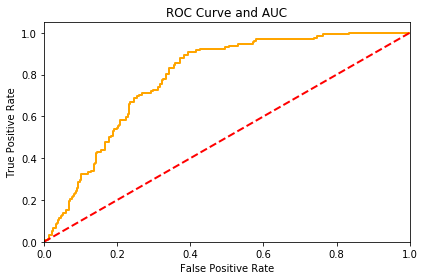

---------------------------------------------------------------------------
 Meth 
Drug user percent: 21.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.43478260869565216
Recall: 0.7142857142857143
Accuracy: 0.7478813559322034
F1_Score: 0.5405405405405405


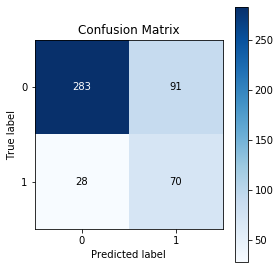


AUC: 0.820937465895449


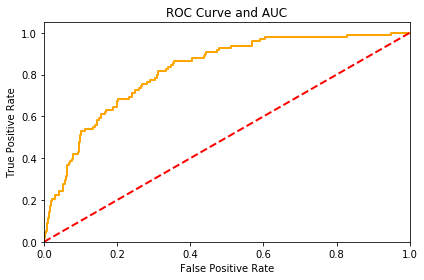

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.3672316384180791
Recall: 0.6632653061224489
Accuracy: 0.6927966101694916
F1_Score: 0.4727272727272727


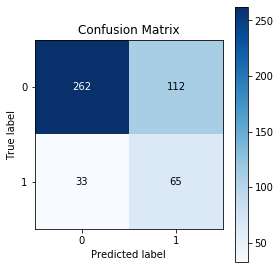


AUC: 0.7517325111862927


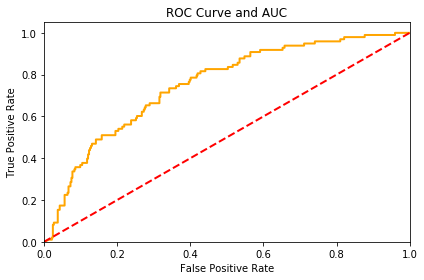

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.4094488188976378
Recall: 0.5306122448979592
Accuracy: 0.7436440677966102
F1_Score: 0.4622222222222222


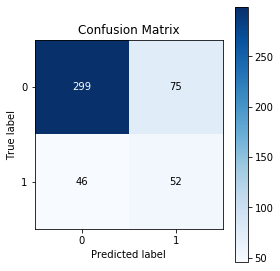


AUC: 0.6650387427698353


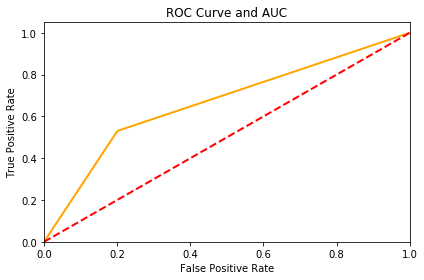

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.358974358974359
Recall: 0.42857142857142855
Accuracy: 0.722457627118644
F1_Score: 0.3906976744186046


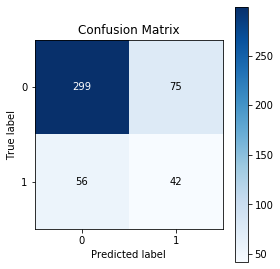


AUC: 0.61401833460657


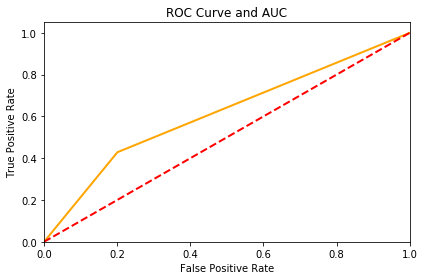

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.5393258426966292
Recall: 0.4897959183673469
Accuracy: 0.8072033898305084
F1_Score: 0.5133689839572191


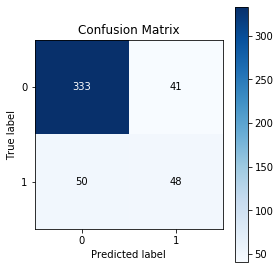


AUC: 0.8353295863800065


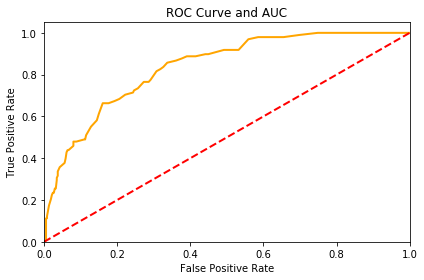

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.46540880503144655
Recall: 0.7551020408163265
Accuracy: 0.7690677966101694
F1_Score: 0.5758754863813229


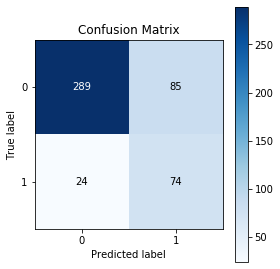


AUC: 0.8312506820910182


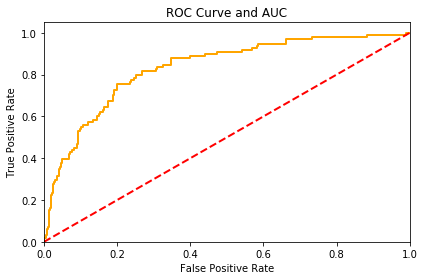

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.43870967741935485
Recall: 0.6938775510204082
Accuracy: 0.7521186440677966
F1_Score: 0.5375494071146244


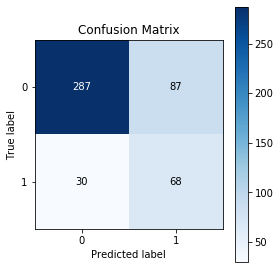

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.47019867549668876
Recall: 0.7244897959183674
Accuracy: 0.7733050847457628
F1_Score: 0.5702811244979921


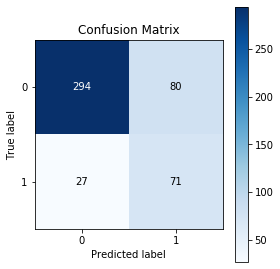


AUC: 0.8309232784022701


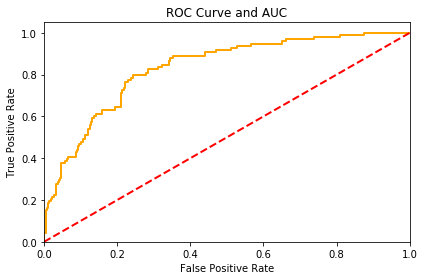

---------------------------------------------------------------------------
 Mushrooms 
Drug user percent: 37.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.6714285714285714
Recall: 0.8057142857142857
Accuracy: 0.7817796610169492
F1_Score: 0.7324675324675324


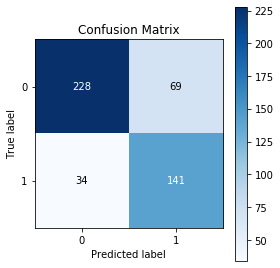


AUC: 0.8343049543049542


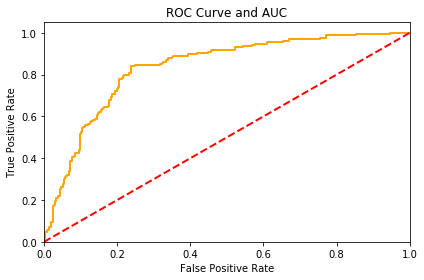

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.697841726618705
Recall: 0.5542857142857143
Accuracy: 0.7457627118644068
F1_Score: 0.6178343949044586


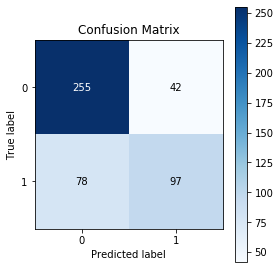


AUC: 0.7813756613756615


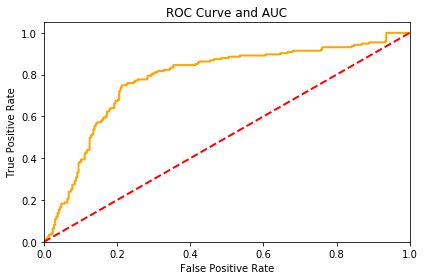

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.5614973262032086
Recall: 0.6
Accuracy: 0.6779661016949152
F1_Score: 0.580110497237569


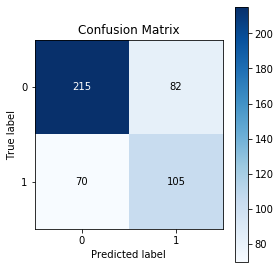


AUC: 0.6619528619528618


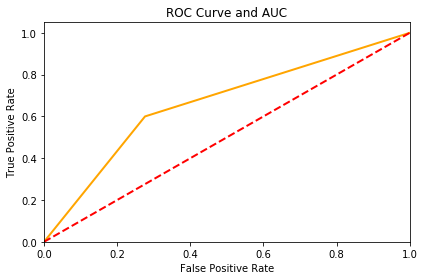

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.6140350877192983
Recall: 0.6
Accuracy: 0.711864406779661
F1_Score: 0.6069364161849711


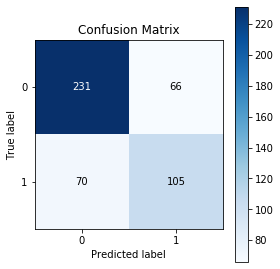


AUC: 0.6888888888888889


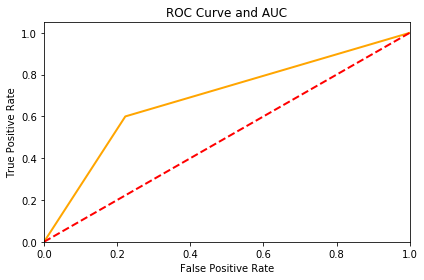

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.6923076923076923
Recall: 0.72
Accuracy: 0.777542372881356
F1_Score: 0.7058823529411765


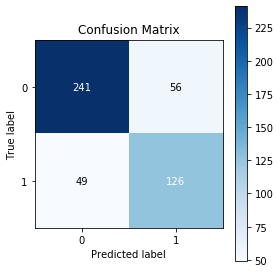


AUC: 0.8336315536315536


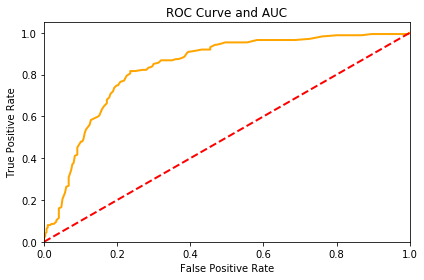

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.6572769953051644
Recall: 0.8
Accuracy: 0.7711864406779662
F1_Score: 0.7216494845360826


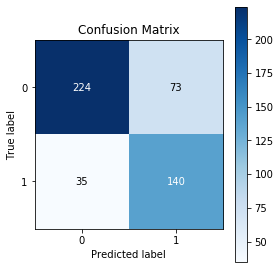


AUC: 0.8414911014911015


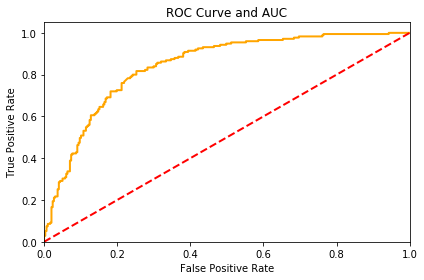

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.6714285714285714
Recall: 0.8057142857142857
Accuracy: 0.7817796610169492
F1_Score: 0.7324675324675324


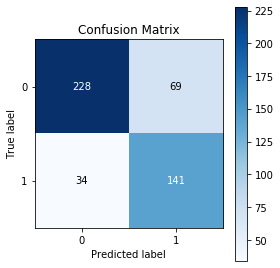

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.6766467065868264
Recall: 0.6457142857142857
Accuracy: 0.7542372881355932
F1_Score: 0.6608187134502923


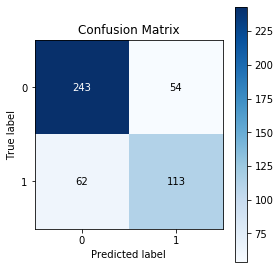


AUC: 0.8155844155844155


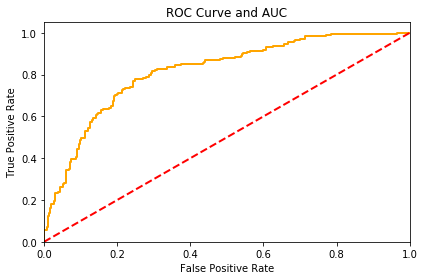

---------------------------------------------------------------------------
 Nicotine 
Drug user percent: 64.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.8214285714285714
Recall: 0.680921052631579
Accuracy: 0.6991525423728814
F1_Score: 0.7446043165467625


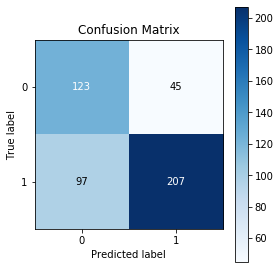


AUC: 0.7858709273182958


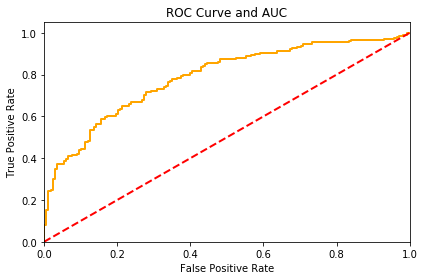

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.8723404255319149
Recall: 0.13486842105263158
Accuracy: 0.4300847457627119
F1_Score: 0.2336182336182336


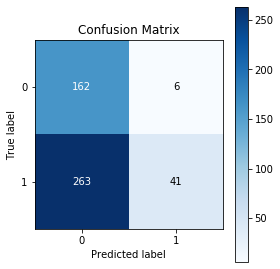


AUC: 0.7454867637844611


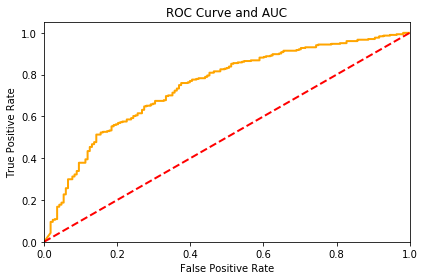

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.7044673539518901
Recall: 0.6743421052631579
Accuracy: 0.6080508474576272
F1_Score: 0.6890756302521008


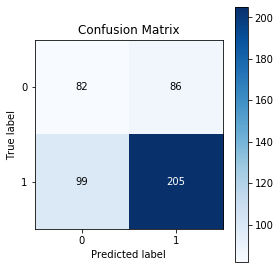


AUC: 0.581218671679198


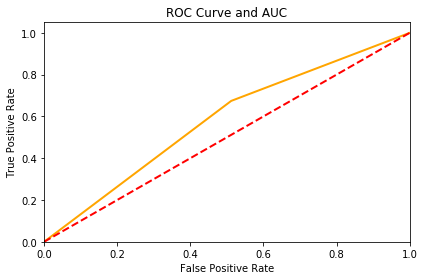

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.7432432432432432
Recall: 0.7236842105263158
Accuracy: 0.6610169491525424
F1_Score: 0.7333333333333334


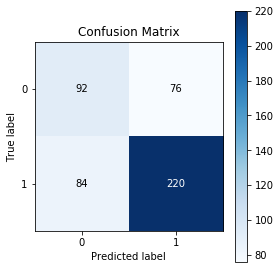


AUC: 0.6356516290726818


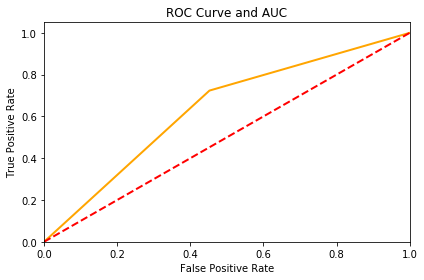

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.7553516819571865
Recall: 0.8125
Accuracy: 0.7097457627118644
F1_Score: 0.7828843106180666


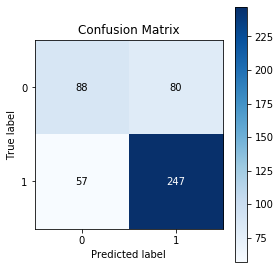


AUC: 0.7291666666666667


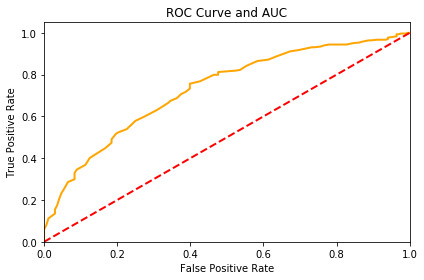

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.7985074626865671
Recall: 0.7039473684210527
Accuracy: 0.6949152542372882
F1_Score: 0.7482517482517482


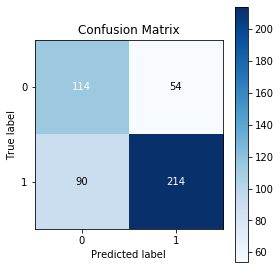


AUC: 0.7533873746867168


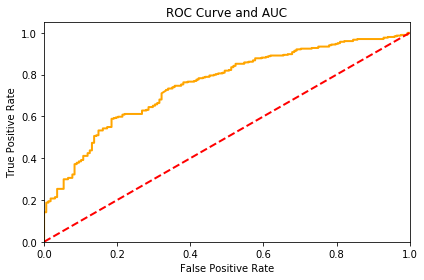

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.842741935483871
Recall: 0.6875
Accuracy: 0.7161016949152542
F1_Score: 0.7572463768115941


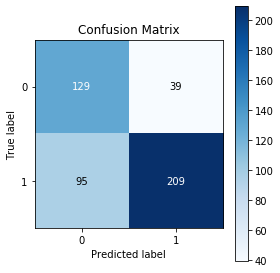

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.7762237762237763
Recall: 0.7302631578947368
Accuracy: 0.690677966101695
F1_Score: 0.7525423728813561


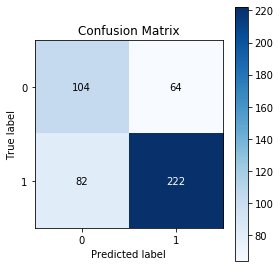


AUC: 0.7584586466165413


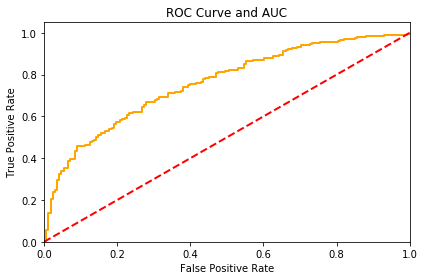

---------------------------------------------------------------------------


In [110]:
# Run all models for each drug and create a dataframe for each drug
drug_use_dfs_dict = {}
for key in drug_dict.keys():
    start = "\033[1m"
    end = "\033[0;0m"
    print(start, key[:-3], end)
    final_df = modeling_steps(drug_dict[key])
    drug_use_dfs_dict[key[:-3]] = final_df

In [130]:
# Reset index of each dataframe and combine into one full dataframe
full_df = pd.DataFrame()
for key in drug_use_dfs_dict.keys():
    df = drug_use_dfs_dict[key]
    df['Drug'] = [key for i in range(len(df))]
    full_df = pd.concat([full_df, df], join = 'outer')
full_df.reset_index(drop = True, inplace = True)
full_df.drop('index', axis = 1, inplace = True)
full_df = full_df[['Drug', 'Model', 'Metric', 'Score']]
full_df

Drug                Model     Metric     Score
0     Alcohol  Logistic_Regression  Precision  0.980716
1     Alcohol  Logistic_Regression     Recall  0.775599
2     Alcohol  Logistic_Regression   Accuracy  0.766949
3     Alcohol  Logistic_Regression   F1_Score  0.866180
4     Alcohol  Logistic_Regression        AUC  0.705212
..        ...                  ...        ...       ...
658  Nicotine                  SGD  Precision  0.776224
659  Nicotine                  SGD     Recall  0.730263
660  Nicotine                  SGD   Accuracy  0.690678
661  Nicotine                  SGD   F1_Score  0.752542
662  Nicotine                  SGD        AUC  0.758459

[663 rows x 4 columns]

In [131]:
# Output clean final dataframe to csv
full_df.to_csv('Drug_classifier_scores_df.csv')

In [133]:
# Load in data to check and further modify
drug_classifier_scores_df = pd.read_csv('Drug_classifier_scores_df.csv', index_col = 'Unnamed: 0')
drug_classifier_scores_df

Drug                Model     Metric     Score
0     Alcohol  Logistic_Regression  Precision  0.980716
1     Alcohol  Logistic_Regression     Recall  0.775599
2     Alcohol  Logistic_Regression   Accuracy  0.766949
3     Alcohol  Logistic_Regression   F1_Score  0.866180
4     Alcohol  Logistic_Regression        AUC  0.705212
..        ...                  ...        ...       ...
658  Nicotine                  SGD  Precision  0.776224
659  Nicotine                  SGD     Recall  0.730263
660  Nicotine                  SGD   Accuracy  0.690678
661  Nicotine                  SGD   F1_Score  0.752542
662  Nicotine                  SGD        AUC  0.758459

[663 rows x 4 columns]

In [134]:
# Pivot dataframe into searchable table
drug_classifier_scores_df = drug_classifier_scores_df.pivot_table(values = ['Score'], index = ['Drug'],
                                                                  columns = ['Model', 'Metric'])
drug_classifier_scores_df

Score                                                    \
Model       Decision_Tree                                               KNN   
Metric                AUC  Accuracy  F1_Score Precision    Recall       AUC   
Drug                                                                          
Alcohol          0.554047  0.932203  0.964758  0.975501  0.954248  0.525725   
Amphet           0.620427  0.650424  0.518950  0.549383  0.491713  0.647073   
Amyl             0.528092  0.667373  0.248804  0.206349  0.313253  0.655806   
Benzos           0.612923  0.618644  0.545455  0.509434  0.586957  0.626585   
Caffeine         0.581689  0.949153  0.973742  0.971616  0.975877  0.496162   
Cannabis         0.719807  0.739407  0.797364  0.812081  0.783172  0.733695   
Chocolate        0.479614  0.947034  0.972797  0.986755  0.959227  0.467811   
Cocaine          0.605388  0.629237  0.504249  0.491713  0.517442  0.601202   
Crack            0.565911  0.819915  0.190476  0.149254  0.263158  0.557664   
Ecstacy          0.614839  0.633475  0.531165  0.535519  0.526882  0.678416   
Heroin           0.579390  0.826271  0.254545  0.250000  0.259259  0.564416   
Ketamine         0.582035  0.745763  0.325843  0.341176  0.311828  0.605654   
LSD              0.640998  0.686441  0.489655  0.449367  0.537879  0.642291   
Legal_highs      0.690264  0.701271  0.637532  0.663102  0.613861  0.726238   
Meth             0.614018  0.722458  0.390698  0.358974  0.428571  0.665039   
Mushrooms        0.688889  0.711864  0.606936  0.614035  0.600000  0.661953   
Nicotine         0.635652  0.661017  0.733333  0.743243  0.723684  0.581219   

                                                     ...                      \
Model                                                ...       SGD             
Metric       Accuracy  F1_Score Precision    Recall  ...       AUC  Accuracy   
Drug                                                 ...                       
Alcohol      0.877119  0.934240  0.973995  0.897603  ...  0.703704  0.703390   
Amphet       0.665254  0.565934  0.562842  0.569061  ...  0.746806  0.665254   
Amyl         0.737288  0.415094  0.341085  0.530120  ...  0.737356  0.728814   
Benzos       0.637712  0.553525  0.532663  0.576087  ...  0.721996  0.680085   
Caffeine     0.900424  0.947486  0.965831  0.929825  ...  0.579084  0.788136   
Cannabis     0.750000  0.804636  0.823729  0.786408  ...  0.824051  0.718220   
Chocolate    0.923729  0.960352  0.986425  0.935622  ...  0.521459  0.764831   
Cocaine      0.620763  0.504155  0.481481  0.529070  ...  0.666628  0.654661   
Crack        0.760593  0.175182  0.121212  0.315789  ...  0.746241  0.713983   
Ecstacy      0.684322  0.618926  0.590244  0.650538  ...  0.800493  0.694915   
Heroin       0.771186  0.228571  0.186047  0.296296  ...  0.792575  0.735169   
Ketamine     0.705508  0.371041  0.320312  0.440860  ...  0.739893  0.686441   
LSD          0.671610  0.495114  0.434286  0.575758  ...  0.785250  0.701271   
Legal_highs  0.722458  0.698851  0.652361  0.752475  ...  0.883902  0.779661   
Meth         0.743644  0.462222  0.409449  0.530612  ...  0.830923  0.773305   
Mushrooms    0.677966  0.580110  0.561497  0.600000  ...  0.815584  0.754237   
Nicotine     0.608051  0.689076  0.704467  0.674342  ...  0.758459  0.690678   

                                                                         \
Model                                           SVC                       
Metric       F1_Score Precision    Recall       AUC  Accuracy  F1_Score   
Drug                                                                      
Alcohol      0.822335  0.984802  0.705882  0.647562  0.815678  0.897285   
Amphet       0.618357  0.549356  0.707182  0.800308  0.718220  0.671605   
Amyl         0.462185  0.354839  0.662651  0.722055  0.720339  0.435897   
Benzos       0.584022  0.592179  0.576087  0.768909  0.699153  0.645000   
Caffeine     0.880096  0.970899  0.804825  0.620614  0.858051  0.922900   
Cann

### Data Exploration

In [29]:
total_drug_use_dict = {}
for key in drug_dict.keys():
    X, y = get_x_y(drug_dict[key])
    y_pos = y.target.value_counts()[1]
    drug_user_percent = round(y_pos/ len(y), 2)
    total_drug_use_dict[key[:-3]] = drug_user_percent
total_drug_use_dict

{'Alcohol': 0.96,
 'Amphet': 0.36,
 'Amyl': 0.2,
 'Benzos': 0.41,
 'Caffeine': 0.98,
 'Cannabis': 0.67,
 'Chocolate': 0.98,
 'Cocaine': 0.36,
 'Crack': 0.1,
 'Ecstacy': 0.4,
 'Heroin': 0.11,
 'Ketamine': 0.19,
 'Legal_highs': 0.4,
 'LSD': 0.3,
 'Meth': 0.22,
 'Mushrooms': 0.37,
 'Nicotine': 0.67}

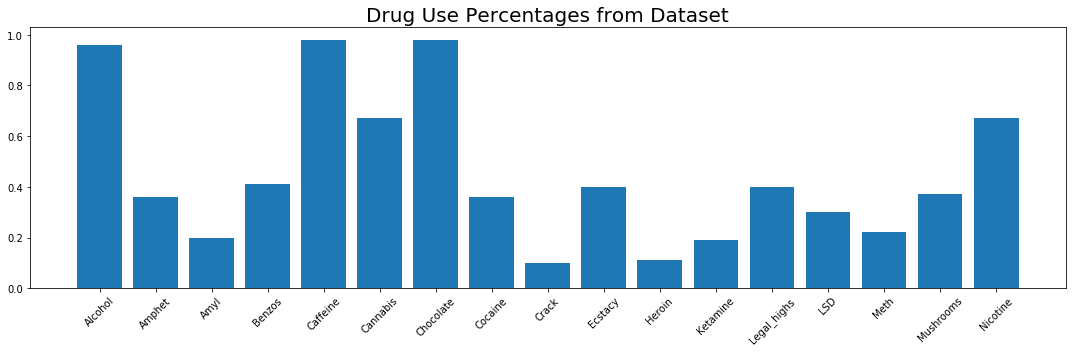

In [30]:
# Barplot of Drug Use Percentages
fig = plt.figure(figsize = (15,5))
plt.bar(range(len(total_drug_use_dict)), list(total_drug_use_dict.values()), align='center')
plt.xticks(range(len(total_drug_use_dict)), list(total_drug_use_dict.keys()), rotation = 45)
plt.title('Drug Use Percentages from Dataset', fontsize = 20)
plt.tight_layout()
plt.show()